# Analysis of political tweets - data exploration and descriptive statistics

Analysis of US political tweets 2008-2017 part one: Examining and preparing the data

In [2]:
import pandas as pd

In [3]:
import json

In [4]:
chunks = pd.read_json('Documents/tweets.json', lines=True, chunksize = 10000)

In [5]:
type(chunks)

pandas.io.json._json.JsonReader

In [6]:
df = pd.concat([chunk for chunk in chunks])

In [318]:
df.head()

,contributors,coordinates,created_at,display_text_range,entities,favorite_count,favorited,geo,id,id_str,...,text,truncated,user_id,possibly_sensitive,extended_entities,quoted_status_id,quoted_status_id_str,withheld_copyright,withheld_in_countries,withheld_scope
0,NaN,NaN,2008-08-04 17:28:51,"[0, 74]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",0,False,NaN,877418565,877418565,...,On a conference call about a weekend trip to I...,False,5558312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2008-08-06 19:04:45,"[0, 25]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",0,False,NaN,879618172,879618172,...,Being interviewed by KTHV,False,5558312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2008-08-06 20:35:36,"[0, 65]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",0,False,NaN,879695803,879695803,...,Being interviewed by KARN on his Arkansas Worl...,False,5558312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2008-08-07 13:52:52,"[0, 37]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",0,False,NaN,880393665,880393665,...,"On KWHN in Fort Smith, that's 1320 AM",False,5558312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,2008-08-07 15:12:05,"[0, 90]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",0,False,NaN,880474266,880474266,...,Attending a Military of the Purple Heart Cerem...,False,5558312,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243370 entries, 0 to 1243369
Data columns (total 32 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   contributors               0 non-null        float64       
 1   coordinates                2734 non-null     object        
 2   created_at                 1243370 non-null  datetime64[ns]
 3   display_text_range         1243370 non-null  object        
 4   entities                   1243370 non-null  object        
 5   favorite_count             1243370 non-null  int64         
 6   favorited                  1243370 non-null  bool          
 7   geo                        2734 non-null     object        
 8   id                         1243370 non-null  int64         
 9   id_str                     1243370 non-null  int64         
 10  in_reply_to_screen_name    65411 non-null    object        
 11  in_reply_to_status_id      54146 non-

In [9]:
df = df.astype({"text":"string"})

In [10]:
print("begin_time:" ,df.created_at.min())

begin_time: 2008-08-04 17:28:51


In [11]:
print("end_time:" ,df.created_at.max())

end_time: 2017-06-06 17:16:00


In [12]:
import matplotlib

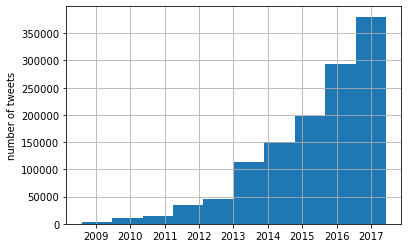

In [262]:
df.created_at.hist()
plt.ylabel("number of tweets");

In [14]:
[text for text in df["text"] if ".@" in text]

['.@mograndpa@jaketapper Congrats on baby Jack. So glad his grandfather is a good influence. Be sure he cheers for Tigers thursday night.',
 ".@schwanderer Now I'm laughing ourt loud. B O U R G U I G N O N. Bourguignon.",
 'Missourian  and Cardinal fan Jack Dorsey featured on CBS evening news.@jack who founded Twitter.#MO',
 'From GOP Conference - what 9.8% unemployment really means...@gopconference #TCOT http://tinyurl.com/ybg7olw',
 ".@eliotfrick @lisarokusek I've explained bfor, but need to repeat frm time to time. I read every single tweet I recieve. Reply to many.",
 ".@ileana582004 I feel exactly the same way. Unfortunately some who disagree with me get ugly.That's ok, but not very persuasive or effective",
 '.@ABGRAY Bad, Bad,Bad weekend for sports in the state I love. Cards, Tigers, and today another bad ending for Chiefs. ugh.',
 '.@aliceinthewater Some dance mom trivia for you:ballet dancers use "merde" for good luck.Don\'t ask me y,cuz it has stinky meaning in French.',
 ".@

In [15]:
df.groupby("screen_name").size().sort_values(ascending=False).head(10)

screen_name
RepDonBeyer        3258
SenatorDurbin      3252
GovMattBevin       3250
MassGovernor       3250
GrahamBlog         3249
SenTomCotton       3249
onetoughnerd       3249
SenRonJohnson      3249
RepScottPeters     3248
GovMalloyOffice    3247
dtype: int64

Part 2: Isolating the user mentions

In [16]:
entities = pd.DataFrame(df.entities)
entities["screen_name"] = df["screen_name"]

In [17]:
entities

,entities,screen_name
0,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",JohnBoozman
1,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",JohnBoozman
2,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",JohnBoozman
3,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",JohnBoozman
4,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",JohnBoozman
...,...,...
1243365,"{'hashtags': [{'indices': [12, 22], 'text': 'D...",PramilaJayapal
1243366,"{'hashtags': [{'indices': [22, 35], 'text': 'C...",RepSarbanes
1243367,"{'hashtags': [{'indices': [124, 140], 'text': ...",SenMarkey
1243368,"{'hashtags': [{'indices': [55, 58], 'text': 'V...",MarioDB


In [18]:
user_mentions = entities

In [19]:
user_mentions["entities"] = user_mentions["entities"].apply(lambda x:x["user_mentions"])

In [20]:
user_mentions

,entities,screen_name
0,[],JohnBoozman
1,[],JohnBoozman
2,[],JohnBoozman
3,[],JohnBoozman
4,[],JohnBoozman
...,...,...
1243365,[],PramilaJayapal
1243366,"[{'id': 15207668, 'id_str': '15207668', 'indic...",RepSarbanes
1243367,"[{'id': 828997388920619008, 'id_str': '8289973...",SenMarkey
1243368,"[{'id': 822215679726100480, 'id_str': '8222156...",MarioDB


In [21]:
def separate_user_mentions():
    mention_list=[]
    for tweet_id, tweeter, user_mention in zip(user_mentions.index, user_mentions.screen_name, user_mentions.entities):
        for user_mention_single in user_mention:
                mention_list.append((tweet_id, tweeter, user_mention_single['id'], user_mention_single['screen_name']))
    return mention_list
separate_user_mentions()

[(80, 'Jim_Jordan', 14551366, 'AlanBarber'),
 (81, 'Jim_Jordan', 15394954, 'boblatta'),
 (82, 'Jim_Jordan', 14410652, 'club4growth'),
 (83, 'Jim_Jordan', 16232940, 'michaelpleahy'),
 (86, 'Jim_Jordan', 15869470, 'penneymarie'),
 (87, 'Jim_Jordan', 15311605, 'mike_ware'),
 (90, 'Jim_Jordan', 17993620, 'kenblackwell'),
 (91, 'Jim_Jordan', 18217624, 'MicheleBachmann'),
 (92, 'Jim_Jordan', 15721640, 'James_Barnes'),
 (92, 'Jim_Jordan', 17993906, 'tweetcongress'),
 (93, 'Jim_Jordan', 15428227, 'kevinomccarthy'),
 (99, 'Jim_Jordan', 18189399, 'DoubleTap'),
 (99, 'Jim_Jordan', 714580267567067136, 'BoazItsHaky'),
 (102, 'Jim_Jordan', 15351784, 'AndyVance'),
 (102, 'Jim_Jordan', 17752368, 'JanSimpson'),
 (103, 'Jim_Jordan', 18217624, 'MicheleBachmann'),
 (104, 'Jim_Jordan', 181193455, 'CH0WDA'),
 (106, 'Jim_Jordan', 32543638, 'mattlewis01'),
 (113, 'Jim_Jordan', 1236972636, 'yrtv'),
 (124, 'Jim_Jordan', 803933554723979265, 'caddyjimmy'),
 (124, 'Jim_Jordan', 17909913, 'retiredfirecapt'),
 (124,

In [22]:
len(separate_user_mentions())

1018660

In [23]:
user_mentions = pd.DataFrame(separate_user_mentions(), columns=["tweet_id", "tweeter","mention_id","mentioned_user"])

In [24]:
user_mentions

,tweet_id,tweeter,mention_id,mentioned_user
0,80,Jim_Jordan,14551366,AlanBarber
1,81,Jim_Jordan,15394954,boblatta
2,82,Jim_Jordan,14410652,club4growth
3,83,Jim_Jordan,16232940,michaelpleahy
4,86,Jim_Jordan,15869470,penneymarie
...,...,...,...,...
1018655,1243364,RepPaulTonko,1531265618,USCBO
1018656,1243366,RepSarbanes,15207668,HouseGOP
1018657,1243367,SenMarkey,828997388920619008,BetsyDeVosED
1018658,1243368,MarioDB,822215679726100480,POTUS


Part 3: Using Wikipedia API to associate personalities to political parties

In [25]:
import wptools

In [26]:
users = pd.read_json('Documents/users.json', lines=True)
users = users.astype({"id_str":"string"})

In [27]:
parties = {}
import requests
for username, screen_name in zip(users.loc[:,"name"], users.loc[:,"screen_name"]):

    S = requests.Session()

    URL = "https://en.wikipedia.org/w/api.php"
    try:
        
        SEARCHPAGE = username

        PARAMS = {
            "action": "query",
            "format": "json",
            "list": "search",
            "srsearch": SEARCHPAGE
        }

        R = S.get(url=URL, params=PARAMS)
        DATA = R.json()['query']['search'][0]['title']
        so = wptools.page(DATA).get_parse()
        party = so.data['infobox']['party']
        parties[screen_name]=party
    except:
        try:
            SEARCHPAGE = screen_name

            PARAMS = {
                "action": "query",
                "format": "json",
                "list": "search",
                "srsearch": SEARCHPAGE
            }

            R = S.get(url=URL, params=PARAMS)
            DATA = R.json()['query']['search'][0]['title']
            so = wptools.page(DATA).get_parse()
            party = so.data['infobox']['party']
            parties[screen_name]=party
            
        except:
            parties[screen_name]=None

en.wikipedia.org (parse) Bill Walker (American politician)
en.wikipedia.org (imageinfo) File:Bill Walker speaks at gubernato...
Bill Walker (American politician) (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Bill Walk...
  infobox: <dict(22)> name, image, order, lieutenant, term_start, ...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:B...
  pageid: 43731741
  parsetree: <str(62245)> <root><template><title>Short description...
  requests: <list(2)> parse, imageinfo
  title: Bill Walker (American politician)
  wikibase: Q18159074
  wikidata_url: https://www.wikidata.org/wiki/Q18159074
  wikitext: <str(38424)> {{Short description|Governor of Alaska fr...
}
en.wikipedia.org (parse) Amy Klobuchar
en.wikipedia.org (imageinfo) File:Amy Klobuchar, official portrai...
Amy Klobuchar (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Amy Klobu...
  infobox: <dict(34)> name, image, caption, alt, office, term_star...
  iwlinks: <list(4)> 

en.wikipedia.org (imageinfo) File:Dutch Ruppersberger 2.jpg
Dutch Ruppersberger (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Dutch Rup...
  infobox: <dict(26)> name, image, state, district, term_start, pr...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:D...
  pageid: 414531
  parsetree: <str(40628)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Dutch Ruppersberger
  wikibase: Q981559
  wikidata_url: https://www.wikidata.org/wiki/Q981559
  wikitext: <str(27063)> {{short description|U.S. Representative f...
}
en.wikipedia.org (parse) Clay Higgins
en.wikipedia.org (imageinfo) File:Clay Higgins official portrait.jpg
Clay Higgins (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Clay Higg...
  infobox: <dict(21)> name, image, state, district, term_start, pr...
  pageid: 52343635
  parsetree: <str(54609)> <root><template><title>short description...
  requests: <list(2)> parse, imagein

en.wikipedia.org (parse) John Culberson
en.wikipedia.org (imageinfo) File:John Culberson official portrait.jpg
John Culberson (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:John Culb...
  infobox: <dict(19)> name, image, state, district, term_start, te...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:J...
  pageid: 947607
  parsetree: <str(37307)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: John Culberson
  wikibase: Q671976
  wikidata_url: https://www.wikidata.org/wiki/Q671976
  wikitext: <str(26836)> {{short description|American attorney and...
}
en.wikipedia.org (parse) Principal Skinner
en.wikipedia.org (imageinfo) File:Seymour Skinner.png
Principal Skinner (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Seymour S...
  infobox: <dict(14)> color, name, series, image, first_major, fir...
  pageid: 2476052
  parsetree: <str(21654)> <root><template><title>short description...
 

en.wikipedia.org (parse) Devin Nunes
en.wikipedia.org (imageinfo) File:Devin Nunes.jpg
Devin Nunes (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Devin Nun...
  infobox: <dict(28)> name, honorific_suffix, image, office, term_...
  pageid: 408872
  parsetree: <str(138767)> <root><template><title>Short descriptio...
  requests: <list(2)> parse, imageinfo
  title: Devin Nunes
  wikibase: Q539493
  wikidata_url: https://www.wikidata.org/wiki/Q539493
  wikitext: <str(113852)> {{Short description|American politician ...
}
en.wikipedia.org (parse) Donald Norcross
en.wikipedia.org (imageinfo) File:Donald Norcross official portrait.jpg
Donald Norcross (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Donald No...
  infobox: <dict(27)> name, image, alt, state, district, term_star...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:D...
  pageid: 24955931
  parsetree: <str(41623)> <root><template><title>Short description...
  requests: <lis

en.wikipedia.org (parse) Gina Raimondo
en.wikipedia.org (imageinfo) File:Gina Raimondo.jpg
Gina Raimondo (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Gina Raim...
  infobox: <dict(28)> image, caption, office, president, deputy, t...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:G...
  pageid: 34584857
  parsetree: <str(105683)> <root><template><title>Short descriptio...
  requests: <list(2)> parse, imageinfo
  title: Gina Raimondo
  wikibase: Q5562913
  wikidata_url: https://www.wikidata.org/wiki/Q5562913
  wikitext: <str(80592)> {{Short description|American politician a...
}
en.wikipedia.org (parse) G. K. Butterfield
en.wikipedia.org (imageinfo) File:GK Butterfield, Official photo ...
G. K. Butterfield (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:GK Butter...
  infobox: <dict(36)> name, image, office, leader, term_start, ter...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:G...
  pageid: 850143
  par

en.wikipedia.org (parse) Gary Herbert
en.wikipedia.org (imageinfo) File:Gary Herbert 2019.jpg
Gary Herbert (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Gary Herb...
  infobox: <dict(36)> name, image, order, lieutenant, term_start, ...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:G...
  pageid: 5262196
  parsetree: <str(57206)> <root><template><title>Short description...
  requests: <list(2)> parse, imageinfo
  title: Gary Herbert
  wikibase: Q881188
  wikidata_url: https://www.wikidata.org/wiki/Q881188
  wikitext: <str(44543)> {{Short description|17th Governor of Utah...
}
en.wikipedia.org (parse) Dannel Malloy
en.wikipedia.org (imageinfo) File:Dannel Malloy 2016.jpg
Dannel Malloy (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Dannel Ma...
  infobox: <dict(25)> name, caption, image, office1, term_start1, ...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:D...
  pageid: 4003354
  parsetree: <str(68504)> 

en.wikipedia.org (parse) Lindsey Graham
en.wikipedia.org (imageinfo) File:U.S. Senator Lindsey Graham, Of...
Lindsey Graham (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:U.S. Sena...
  infobox: <dict(46)> name, image, caption, jr/sr, state, alongsid...
  iwlinks: <list(2)> https://commons.wikimedia.org/wiki/Lindsey_Gr...
  pageid: 363279
  parsetree: <str(254540)> <root><template><title>Short descriptio...
  requests: <list(2)> parse, imageinfo
  title: Lindsey Graham
  wikibase: Q22212
  wikidata_url: https://www.wikidata.org/wiki/Q22212
  wikitext: <str(210169)> {{Short description|American lawyer and ...
}
en.wikipedia.org (parse) I See You (2019 film)
en.wikipedia.org (imageinfo) File:ISeeYouPoster.jpeg
I See You (2019 film) (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:ISeeYouPo...
  infobox: <dict(18)> name, image, caption, director, producers, s...
  pageid: 60184144
  parsetree: <str(17079)> <root><template><title>Short description.

en.wikipedia.org (parse) Jerry Brown
en.wikipedia.org (imageinfo) File:Edmund G Brown Jr.jpg
Jerry Brown (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Edmund G ...
  infobox: <dict(47)> name, image, caption, order, lieutenant, ter...
  iwlinks: <list(1)> https://en.wikiquote.org/wiki/Special:Search/...
  pageid: 175220
  parsetree: <str(139517)> <root><template><title>Short descriptio...
  requests: <list(2)> parse, imageinfo
  title: Jerry Brown
  wikibase: Q152451
  wikidata_url: https://www.wikidata.org/wiki/Q152451
  wikitext: <str(114060)> {{Short description|American politician ...
}
en.wikipedia.org (parse) Jerry Moran
en.wikipedia.org (imageinfo) File:Jerry Moran, official portrait,...
Jerry Moran (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Jerry Mor...
  infobox: <dict(43)> name, image, jr/sr, state, alongside, term_s...
  pageid: 408584
  parsetree: <str(97892)> <root><template><title>Short description...
  requests: <list(2)> p

en.wikipedia.org (parse) Judge Carter
Judge Carter (en) data
{
  pageid: 72054204
  parsetree: <str(1201)> <root>'''Judge Carter''' may refer to:<h ...
  requests: <list(1)> parse
  title: Judge Carter
  wikibase: Q114877729
  wikidata_url: https://www.wikidata.org/wiki/Q114877729
  wikitext: <str(1029)> '''Judge Carter''' may refer to:==Canada==...
}
en.wikipedia.org (parse) Ted Poe
en.wikipedia.org (imageinfo) File:Ted Poe Official.jpg
Ted Poe (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Ted Poe O...
  infobox: <dict(24)> name, image, state, district, term_start, te...
  iwlinks: <list(7)> https://commons.wikimedia.org/wiki/Category:T...
  pageid: 1132677
  parsetree: <str(38601)> <root><template><title>Short description...
  requests: <list(2)> parse, imageinfo
  title: Ted Poe
  wikibase: Q532661
  wikidata_url: https://www.wikidata.org/wiki/Q532661
  wikitext: <str(28855)> {{Short description|American politician}}...
}
en.wikipedia.org (parse) Julia Brownle

en.wikipedia.org (parse) Nancy Thornberry
en.wikipedia.org (imageinfo) File:Nancy A. Thornberry at SCI-Perk...
Nancy Thornberry (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Nancy A. ...
  infobox: <dict(8)> name, image, caption, nationality, field, wor...
  pageid: 55519401
  parsetree: <str(21326)> <root><template><title>Infobox scientist...
  requests: <list(2)> parse, imageinfo
  title: Nancy Thornberry
  wikibase: Q42211863
  wikidata_url: https://www.wikidata.org/wiki/Q42211863
  wikitext: <str(16574)> {{Infobox scientist| name              = ...
}
en.wikipedia.org (parse) Marco Rubio
en.wikipedia.org (imageinfo) File:Senator Rubio official portrait.jpg
Marco Rubio (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Senator R...
  infobox: <dict(47)> image, caption, jr/sr1, state1, alongside1, ...
  iwlinks: <list(2)> https://commons.wikimedia.org/wiki/Category:M...
  pageid: 5502549
  parsetree: <str(261039)> <root><template><title>Short d

en.wikipedia.org (parse) Marcia Fudge
en.wikipedia.org (imageinfo) File:SecretaryMarciaFudge.jpg
Marcia Fudge (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Secretary...
  infobox: <dict(30)> name, image, caption, office, president, dep...
  iwlinks: <list(2)> https://commons.wikimedia.org/wiki/Category:M...
  pageid: 19286605
  parsetree: <str(52175)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Marcia Fudge
  wikibase: Q461746
  wikidata_url: https://www.wikidata.org/wiki/Q461746
  wikitext: <str(37812)> {{short description|U.S. Secretary of Hou...
}
en.wikipedia.org (parse) Nancy Pelosi
en.wikipedia.org (imageinfo) File:Official photo of Speaker Nancy...
Nancy Pelosi (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Official ...
  infobox: <dict(58)> name, image, caption, office1, term_start1, ...
  iwlinks: <list(6)> https://commons.wikimedia.org/wiki/Category:S...
  pageid: 147301
  parsetree: 

en.wikipedia.org (parse) Peter Roskam
en.wikipedia.org (imageinfo) File:Peter J. Roskam 113th Congress.jpg
Peter Roskam (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Peter J. ...
  infobox: <dict(33)> name, image, caption, state, district, term_...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:P...
  pageid: 7840313
  parsetree: <str(100010)> <root><template><title>short descriptio...
  requests: <list(2)> parse, imageinfo
  title: Peter Roskam
  wikibase: Q968214
  wikidata_url: https://www.wikidata.org/wiki/Q968214
  wikitext: <str(73634)> {{short description|American politician}}...
}
en.wikipedia.org (parse) Peter Welch
en.wikipedia.org (imageinfo) File:Peter Welch official Senate photo.jpg
Peter Welch (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Peter Wel...
  infobox: <dict(47)> name, image, jr/sr, alongside, state, term_s...
  iwlinks: <list(3)> https://commons.wikimedia.org/wiki/Category:P...
  pageid: 5255966
  

en.wikipedia.org (parse) Al Green (politician)
en.wikipedia.org (imageinfo) File:Al Green Official.jpg
Al Green (politician) (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Al Green ...
  infobox: <dict(15)> name, image, state, district, term_start, pr...
  iwlinks: <list(2)> https://commons.wikimedia.org/wiki/Category:A...
  pageid: 517069
  parsetree: <str(26916)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Al Green (politician)
  wikibase: Q749039
  wikidata_url: https://www.wikidata.org/wiki/Q749039
  wikitext: <str(20221)> {{short description|U.S. Representative f...
}
en.wikipedia.org (parse) Al Lawson
en.wikipedia.org (imageinfo) File:Al Lawson 115th Congress photo.jpg
Al Lawson (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Al Lawson...
  infobox: <dict(45)> name, image, state, district, term_start, te...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:A...
  pageid: 1371

en.wikipedia.org (parse) Ben Ray Luján
en.wikipedia.org (imageinfo) File:Ben Ray Lujan, 117th Congress p...
Ben Ray Luján (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Ben Ray L...
  infobox: <dict(38)> name, image, jr/sr, state, term_start, along...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:B...
  pageid: 16939161
  parsetree: <str(63109)> <root><template><title>Short description...
  requests: <list(2)> parse, imageinfo
  title: Ben Ray Luján
  wikibase: Q324256
  wikidata_url: https://www.wikidata.org/wiki/Q324256
  wikitext: <str(40227)> {{Short description|American politician (...
}
en.wikipedia.org (parse) Ami Bera
en.wikipedia.org (imageinfo) File:Ami Bera official portrait.jpg
Ami Bera (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Ami Bera ...
  infobox: <dict(13)> image, office, term_start, predecessor, cons...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:A...
  pageid: 28670879
  parsetre

en.wikipedia.org (parse) Bob Brady
en.wikipedia.org (imageinfo) File:Bobbrady.jpeg
Bob Brady (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Bobbrady....
  infobox: <dict(23)> name, image, office1, term_start1, term_end1...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:B...
  pageid: 962165
  parsetree: <str(78253)> <root><template><title>Short description...
  requests: <list(2)> parse, imageinfo
  title: Bob Brady
  wikibase: Q434522
  wikidata_url: https://www.wikidata.org/wiki/Q434522
  wikitext: <str(51112)> {{Short description|American politician}}...
}
en.wikipedia.org (parse) Brendan Boyle
en.wikipedia.org (imageinfo) File:Brendan Boyle - 2018-05-21 ec 0...
Brendan Boyle (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Brendan B...
  infobox: <dict(25)> name, image, state, office, term_start, pred...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:B...
  pageid: 18373871
  parsetree: <str(41456)> <root

en.wikipedia.org (parse) Charlie Dent
en.wikipedia.org (imageinfo) File:Charlie Dent official photo.jpg
Charlie Dent (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Charlie D...
  infobox: <dict(32)> name, image, office, term_start, term_end, p...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:C...
  pageid: 1184496
  parsetree: <str(50397)> <root><template><title>Short description...
  requests: <list(2)> parse, imageinfo
  title: Charlie Dent
  wikibase: Q556034
  wikidata_url: https://www.wikidata.org/wiki/Q556034
  wikitext: <str(37788)> {{Short description|American politician}}...
}
en.wikipedia.org (parse) Cheri Bustos
en.wikipedia.org (imageinfo) File:Cheri Bustos official photo.jpg
Cheri Bustos (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Cheri Bus...
  infobox: <dict(34)> name, image, office, leader, term_start, ter...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:C...
  pageid: 35915364
  parset

en.wikipedia.org (parse) Dan Donovan (keyboardist)
Dan Donovan (keyboardist) (en) data
{
  infobox: <dict(9)> name, birth_name, birth_place, genre, occupat...
  pageid: 4375134
  parsetree: <str(5893)> <root><template><title>Use dmy dates</tit...
  requests: <list(1)> parse
  title: Dan Donovan (keyboardist)
  wikibase: Q5213395
  wikidata_url: https://www.wikidata.org/wiki/Q5213395
  wikitext: <str(3200)> {{Use dmy dates|date=April 2023}}{{BLP sou...
}
en.wikipedia.org (parse) Dan Donovan (politician)
en.wikipedia.org (imageinfo) File:Dan Donovan official photo.jpg
Dan Donovan (politician) (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Dan Donov...
  infobox: <dict(26)> name, image, state, district, term_start, te...
  pageid: 27446608
  parsetree: <str(50908)> <root><template><title>Short description...
  requests: <list(2)> parse, imageinfo
  title: Dan Donovan (politician)
  wikibase: Q5217998
  wikidata_url: https://www.wikidata.org/wiki/Q5217998
  wikitext: 

David Young (Iowa politician) (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:David You...
  infobox: <dict(15)> name, image, office, term_start, preceded, o...
  pageid: 43573535
  parsetree: <str(54629)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: David Young (Iowa politician)
  wikibase: Q19321008
  wikidata_url: https://www.wikidata.org/wiki/Q19321008
  wikitext: <str(33682)> {{short description|Former U.S. Represent...
}
en.wikipedia.org (parse) 2014 Oso mudslide
en.wikipedia.org (imageinfo) File:Oso Mudslide 29 March 2014 aeri...
2014 Oso mudslide (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Oso Mudsl...
  infobox: <dict(12)> image, image_size, caption, date, time, plac...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:O...
  pageid: 42297751
  parsetree: <str(108922)> <root><template><title>short descriptio...
  requests: <list(2)> parse, imageinfo
  title: 2014 Oso mud

en.wikipedia.org (parse) 118th United States Congress
en.wikipedia.org (imageinfo) File:2023 United States Capitol 118t...
118th United States Congress (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:2023 Unit...
  infobox: <dict(19)> number, start, end, vp, speaker, reps, senat...
  iwlinks: <list(2)> https://en.wikinews.org/wiki/118th_United_Sta...
  pageid: 52025484
  parsetree: <str(253236)> <root><template><title>Short descriptio...
  requests: <list(2)> parse, imageinfo
  title: 118th United States Congress
  wikibase: Q104842452
  wikidata_url: https://www.wikidata.org/wiki/Q104842452
  wikitext: <str(104467)> {{Short description|2023–2025 meeting of...
}
en.wikipedia.org (parse) 118th United States Congress
en.wikipedia.org (imageinfo) File:2023 United States Capitol 118t...
118th United States Congress (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:2023 Unit...
  infobox: <dict(19)> number, start, end, vp, speaker, reps, senat...
  iw

en.wikipedia.org (parse) Evan Jenkins (politician)
en.wikipedia.org (imageinfo) File:Evan Jenkins official congressi...
Evan Jenkins (politician) (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Evan Jenk...
  infobox: <dict(41)> name, image, office, term_start, term_end, p...
  pageid: 5148038
  parsetree: <str(45999)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Evan Jenkins (politician)
  wikibase: Q5415437
  wikidata_url: https://www.wikidata.org/wiki/Q5415437
  wikitext: <str(31924)> {{short description|American judge and po...
}
en.wikipedia.org (parse) Frank Lucas
Frank Lucas (en) data
{
  infobox: <dict(12)> name, image_name, image_upright, birth_date,...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:F...
  pageid: 7672695
  parsetree: <str(33634)> <root><template><title>Use mdy dates</ti...
  requests: <list(1)> parse
  title: Frank Lucas
  wikibase: Q441241
  wikidata_url: https://www.wikida

en.wikipedia.org (parse) Greg Walden
en.wikipedia.org (imageinfo) File:Greg Walden official photo.jpg
Greg Walden (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Greg Wald...
  infobox: <dict(37)> name, image, office, term_start, term_end, p...
  iwlinks: <list(2)> https://en.wikiquote.org/wiki/Special:Search/...
  pageid: 699507
  parsetree: <str(41471)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Greg Walden
  wikibase: Q1397359
  wikidata_url: https://www.wikidata.org/wiki/Q1397359
  wikitext: <str(28419)> {{short description|Former U.S. Represent...
}
en.wikipedia.org (parse) Glenn Grothman
en.wikipedia.org (imageinfo) File:Glenn Grothman 117th Congress p...
Glenn Grothman (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Glenn Gro...
  infobox: <dict(29)> name, image, state, district, term_start, pr...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:G...
  pageid: 9674182
  par

en.wikipedia.org (parse) Tudor Dixon
en.wikipedia.org (imageinfo) File:Tudor Dixon 2022 (cropped).jpg
Tudor Dixon (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Tudor Dix...
  infobox: <dict(9)> name, image, birth_name, birth_date, national...
  pageid: 69912888
  parsetree: <str(43568)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Tudor Dixon
  wikibase: Q113382855
  wikidata_url: https://www.wikidata.org/wiki/Q113382855
  wikitext: <str(36125)> {{short description|American politician a...
}
en.wikipedia.org (parse) Randy Hultgren
en.wikipedia.org (imageinfo) File:Randy Hultgren Official Photo 112.jpg
Randy Hultgren (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Randy Hul...
  infobox: <dict(38)> name, image, state, district, term_start, te...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:R...
  pageid: 7019059
  parsetree: <str(110132)> <root><template><title>short descriptio

en.wikipedia.org (parse) Jim Cooper
en.wikipedia.org (imageinfo) File:Jim Cooper, Official Portrait, ...
Jim Cooper (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Jim Coope...
  infobox: <dict(21)> name, image, office, term_start, term_end, p...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:J...
  pageid: 960988
  parsetree: <str(81857)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Jim Cooper
  wikibase: Q973737
  wikidata_url: https://www.wikidata.org/wiki/Q973737
  wikitext: <str(60764)> {{short description|American politician}}...
}
en.wikipedia.org (parse) Jim Costa
en.wikipedia.org (imageinfo) File:Jim Costa official portrait.jpg
Jim Costa (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Jim Costa...
  infobox: <dict(30)> name, honorific_suffix, image, office, along...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:J...
  pageid: 1162310
  parsetree: <str(4

en.wikipedia.org (parse) John Katko
en.wikipedia.org (imageinfo) File:John Katko official photo.jpg
John Katko (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:John Katk...
  infobox: <dict(21)> name, image, office, term_start, term_end, p...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:J...
  pageid: 44263355
  parsetree: <str(59866)> <root><template><title>redirect</title><...
  requests: <list(2)> parse, imageinfo
  title: John Katko
  wikibase: Q18619043
  wikidata_url: https://www.wikidata.org/wiki/Q18619043
  wikitext: <str(48718)> {{redirect|Katko|the Iowa Supreme Court c...
}
en.wikipedia.org (parse) Congressional App Challenge
Congressional App Challenge (en) data
{
  pageid: 45089531
  parsetree: <str(95576)> <root><template><title>Short description...
  requests: <list(1)> parse
  title: Congressional App Challenge
  wikibase: Q25212686
  wikidata_url: https://www.wikidata.org/wiki/Q25212686
  wikitext: <str(94305)> {{Short description

en.wikipedia.org (parse) Kevin Brady
en.wikipedia.org (imageinfo) File:Kevin Brady 117th congress.jpeg
Kevin Brady (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Kevin Bra...
  infobox: <dict(31)> name, image, office, term_start, term_end, p...
  pageid: 962112
  parsetree: <str(54457)> <root><template><title>Short description...
  requests: <list(2)> parse, imageinfo
  title: Kevin Brady
  wikibase: Q472241
  wikidata_url: https://www.wikidata.org/wiki/Q472241
  wikitext: <str(40483)> {{Short description|U.S. Representative f...
}
en.wikipedia.org (parse) Kevin Cramer
en.wikipedia.org (imageinfo) File:Kevin Cramer, official portrait...
Kevin Cramer (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Kevin Cra...
  infobox: <dict(33)> name, image, caption, jr/sr, state, alongsid...
  pageid: 11549178
  parsetree: <str(100579)> <root><template><title>Short descriptio...
  requests: <list(2)> parse, imageinfo
  title: Kevin Cramer
  wikibase: Q39570

en.wikipedia.org (parse) Florida's 22nd congressional district
Florida's 22nd congressional district (en) data
{
  infobox: <dict(20)> state, district number, image name, image ca...
  pageid: 6461810
  parsetree: <str(59648)> <root><template><title>Short description...
  requests: <list(1)> parse
  title: Florida's 22nd congressional district
  wikibase: Q5461115
  wikidata_url: https://www.wikidata.org/wiki/Q5461115
  wikitext: <str(31491)> {{Short description|U.S. House district f...
}
en.wikipedia.org (parse) Lou Barletta
en.wikipedia.org (imageinfo) File:Lou Barletta.jpg
Lou Barletta (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Lou Barle...
  infobox: <dict(21)> name, image, alt, state, district, term_star...
  iwlinks: <list(2)> https://commons.wikimedia.org/wiki/Category:L...
  pageid: 16201960
  parsetree: <str(124727)> <root><template><title>short descriptio...
  requests: <list(2)> parse, imageinfo
  title: Lou Barletta
  wikibase: Q25568
  wikidata_ur

Mark Takano (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Mark Taka...
  infobox: <dict(22)> name, image, caption, office1, term_start1, ...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:M...
  pageid: 37017445
  parsetree: <str(32264)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Mark Takano
  wikibase: Q399593
  wikidata_url: https://www.wikidata.org/wiki/Q399593
  wikitext: <str(22414)> {{short description|American politician (...
}
en.wikipedia.org (parse) Mark Walker (North Carolina politician)
en.wikipedia.org (imageinfo) File:Walker Official Photo 2017.jpg
Mark Walker (North Carolina politician) (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Walker Of...
  infobox: <dict(26)> name, image, office, leader, term_start, ter...
  pageid: 43316202
  parsetree: <str(61496)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Mark Walker 

en.wikipedia.org (parse) Michael Bishop
Michael Bishop (en) data
{
  pageid: 2924756
  parsetree: <str(1464)> <root>'''Michael Bishop''' may refer to:<...
  requests: <list(1)> parse
  title: Michael Bishop
  wikibase: Q10583776
  wikidata_url: https://www.wikidata.org/wiki/Q10583776
  wikitext: <str(1150)> '''Michael Bishop''' may refer to:{{TOC ri...
}
en.wikipedia.org (parse) Mike Bishop (politician)
en.wikipedia.org (imageinfo) File:Mike Bishop official congressio...
Mike Bishop (politician) (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Mike Bish...
  infobox: <dict(33)> name, image, state, district, term_start, te...
  pageid: 18208909
  parsetree: <str(26030)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Mike Bishop (politician)
  wikibase: Q16196834
  wikidata_url: https://www.wikidata.org/wiki/Q16196834
  wikitext: <str(17702)> {{short description|American politician f...
}
en.wikipedia.org (parse) Mike Coffm

en.wikipedia.org (imageinfo) File:PaulCook.jpg
Paul Cook (politician) (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:PaulCook....
  infobox: <dict(33)> name, image, office, term_start, predecessor...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:P...
  pageid: 9435059
  parsetree: <str(30636)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Paul Cook (politician)
  wikibase: Q3408766
  wikidata_url: https://www.wikidata.org/wiki/Q3408766
  wikitext: <str(22113)> {{short description|Former U.S. Represent...
}
en.wikipedia.org (parse) Paul Mitchell (politician)
en.wikipedia.org (imageinfo) File:Paul Mitchell official congress...
Paul Mitchell (politician) (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Paul Mitc...
  infobox: <dict(15)> name, image, state, district, term_start, te...
  pageid: 51233713
  parsetree: <str(35622)> <root><template><title>Short description...
  requests: 

en.wikipedia.org (parse) Richard Hudson
Richard Hudson (en) data
{
  pageid: 13198092
  parsetree: <str(959)> <root>'''Richard Hudson''' may refer to:*[...
  requests: <list(1)> parse
  title: Richard Hudson
  wikibase: Q7326584
  wikidata_url: https://www.wikidata.org/wiki/Q7326584
  wikitext: <str(856)> '''Richard Hudson''' may refer to:*[[Richar...
}
en.wikipedia.org (parse) Rich McCormick
en.wikipedia.org (imageinfo) File:Rep. Rich McCormick official ph...
Rich McCormick (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Rep. Rich...
  infobox: <dict(16)> name, image, state, district, term_start, pr...
  pageid: 64229305
  parsetree: <str(22540)> <root><template><title>For</title><part>...
  requests: <list(2)> parse, imageinfo
  title: Rich McCormick
  wikibase: Q115474083
  wikidata_url: https://www.wikidata.org/wiki/Q115474083
  wikitext: <str(13159)> {{For|other persons with similar names|Ri...
}
en.wikipedia.org (parse) Cedric Richmond
en.wikipedia.org (image

en.wikipedia.org (imageinfo) File:Francis Rooney official congres...
Francis Rooney (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Francis R...
  infobox: <dict(21)> name, image, state, district, term_start, te...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:F...
  pageid: 2355853
  parsetree: <str(51148)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Francis Rooney
  wikibase: Q5482337
  wikidata_url: https://www.wikidata.org/wiki/Q5482337
  wikitext: <str(41507)> {{short description|Former U.S. Represent...
}
en.wikipedia.org (parse) Ruben Gallego
en.wikipedia.org (imageinfo) File:Ruben Gallego official portrait.jpg
Ruben Gallego (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Ruben Gal...
  infobox: <dict(27)> name, image, state, term_start, predecessor,...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:R...
  pageid: 26457766
  parsetree: <str(54562)> <root

en.wikipedia.org (imageinfo) File:Congressman Sean Patrick Malone...
Sean Patrick Maloney (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Congressm...
  infobox: <dict(32)> name, image, status, office, president, term...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:S...
  pageid: 3908693
  parsetree: <str(104752)> <root><template><title>short descriptio...
  requests: <list(2)> parse, imageinfo
  title: Sean Patrick Maloney
  wikibase: Q2262244
  wikidata_url: https://www.wikidata.org/wiki/Q2262244
  wikitext: <str(70434)> {{short description|American politician}}...
}
en.wikipedia.org (parse) Carol Shea-Porter
en.wikipedia.org (imageinfo) File:Carol Shea-Porter official photo.jpg
Carol Shea-Porter (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Carol She...
  infobox: <dict(24)> name, image, state, district, term_start, te...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:C...
  pageid: 6178742
  parsetree

en.wikipedia.org (parse) Susan Davis (politician)
en.wikipedia.org (imageinfo) File:Representative Susan Davis Offi...
Susan Davis (politician) (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Represent...
  infobox: <dict(20)> name, image, office, term_start, term_end, p...
  pageid: 409734
  parsetree: <str(22493)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Susan Davis (politician)
  wikibase: Q460675
  wikidata_url: https://www.wikidata.org/wiki/Q460675
  wikitext: <str(15495)> {{short description|American politician i...
}
en.wikipedia.org (parse) Eric Swalwell
en.wikipedia.org (imageinfo) File:Eric Swalwell 114th official ph...
Eric Swalwell (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Eric Swal...
  infobox: <dict(15)> name, image, caption, state, term_start, pre...
  iwlinks: <list(2)> https://commons.wikimedia.org/wiki/Category:E...
  pageid: 37076719
  parsetree: <str(94829)> <root><te

en.wikipedia.org (parse) Tom Emmer
en.wikipedia.org (imageinfo) File:Tom Emmer Congressional Photo 2.jpg
Tom Emmer (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Tom Emmer...
  infobox: <dict(31)> name, image, office, leader, term_start, pre...
  iwlinks: <list(2)> https://commons.wikimedia.org/wiki/Category:T...
  pageid: 23472782
  parsetree: <str(85976)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Tom Emmer
  wikibase: Q7815723
  wikidata_url: https://www.wikidata.org/wiki/Q7815723
  wikitext: <str(59606)> {{short description|U.S. Representative f...
}
en.wikipedia.org (parse) Tom Garrett
en.wikipedia.org (imageinfo) File:Tom Garrett 1937.jpg
Tom Garrett (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Tom Garre...
  infobox: <dict(50)> name, image, image_size, caption, birth_date...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:T...
  pageid: 2391611
  parsetree: <str(14106)

en.wikipedia.org (parse) Val Demings
en.wikipedia.org (imageinfo) File:Val Demings, Official Portrait,...
Val Demings (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Val Demin...
  infobox: <dict(21)> name, image, state, district, term_start, te...
  iwlinks: <list(3)> https://commons.wikimedia.org/wiki/Category:V...
  pageid: 37072819
  parsetree: <str(59013)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Val Demings
  wikibase: Q7909083
  wikidata_url: https://www.wikidata.org/wiki/Q7909083
  wikitext: <str(48040)> {{short description|American politician (...
}
en.wikipedia.org (parse) Marc Veasey
en.wikipedia.org (imageinfo) File:Marc Veasey official photo.jpg
Marc Veasey (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Marc Veas...
  infobox: <dict(20)> name, image, state, district, term_start, pr...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:M...
  pageid: 36608661
  parset

en.wikipedia.org (parse) Rodney Davis (politician)
en.wikipedia.org (imageinfo) File:Rodney Davis official photo 2016.jpg
Rodney Davis (politician) (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Rodney Da...
  infobox: <dict(20)> name, image, office, term_start, term_end, p...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:R...
  pageid: 35907710
  parsetree: <str(73823)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Rodney Davis (politician)
  wikibase: Q134035
  wikidata_url: https://www.wikidata.org/wiki/Q134035
  wikitext: <str(52986)> {{short description|American politician}}...
}
en.wikipedia.org (parse) Roger Marshall (politician)
en.wikipedia.org (imageinfo) File:Roger Marshall 117th Congress p...
Roger Marshall (politician) (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Roger Mar...
  infobox: <dict(26)> name, image, jr/sr, state, alongside, term_s...
  iwlinks: <list(1)

Lamar Alexander (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Lamar Ale...
  infobox: <dict(52)> name, image, alt, caption, jr/sr, state, ter...
  iwlinks: <list(7)> https://commons.wikimedia.org/wiki/Lamar_Alex...
  pageid: 296724
  parsetree: <str(116997)> <root><template><title>short descriptio...
  requests: <list(2)> parse, imageinfo
  title: Lamar Alexander
  wikibase: Q419976
  wikidata_url: https://www.wikidata.org/wiki/Q419976
  wikitext: <str(90838)> {{short description|American politician}}...
}
en.wikipedia.org (parse) Angus King
en.wikipedia.org (imageinfo) File:Angus King, official portrait, ...
Angus King (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Angus Kin...
  infobox: <dict(24)> name, image, caption, jr/sr, state, alongsid...
  iwlinks: <list(2)> https://commons.wikimedia.org/wiki/Category:A...
  pageid: 496707
  parsetree: <str(125161)> <root><template><title>Short descriptio...
  requests: <list(2)> parse, imageinfo
 

en.wikipedia.org (parse) Johnny Isakson
en.wikipedia.org (imageinfo) File:Johnny Isakson official Senate ...
Johnny Isakson (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Johnny Is...
  infobox: <dict(58)> name, image, jr/sr, state, term_start, term_...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:J...
  pageid: 411739
  parsetree: <str(76220)> <root><template><title>Short description...
  requests: <list(2)> parse, imageinfo
  title: Johnny Isakson
  wikibase: Q130024
  wikidata_url: https://www.wikidata.org/wiki/Q130024
  wikitext: <str(46677)> {{Short description|American politician (...
}
en.wikipedia.org (parse) James Lankford
en.wikipedia.org (imageinfo) File:Senator James Lankford official...
James Lankford (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Senator J...
  infobox: <dict(37)> name, image, caption, jr/sr, state, alongsid...
  pageid: 27380096
  parsetree: <str(66023)> <root><template><title>Short descript

en.wikipedia.org (parse) Bob Casey Jr.
en.wikipedia.org (imageinfo) File:Bob Casey Jr. official photo.jpg
Bob Casey Jr. (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Bob Casey...
  infobox: <dict(25)> image, caption, jr/sr, state, alongside, ter...
  iwlinks: <list(2)> https://commons.wikimedia.org/wiki/Category:B...
  pageid: 30875653
  parsetree: <str(129983)> <root><template><title>other people</ti...
  requests: <list(2)> parse, imageinfo
  title: Bob Casey Jr.
  wikibase: Q887841
  wikidata_url: https://www.wikidata.org/wiki/Q887841
  wikitext: <str(88750)> {{other people|Robert Casey}}{{redirect|S...
}
en.wikipedia.org (parse) Bob Corker
en.wikipedia.org (imageinfo) File:Bob Corker official Senate photo.jpg
Bob Corker (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Bob Corke...
  infobox: <dict(33)> name, image, caption, jr/sr, state, term_sta...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Bob_Corker
  pageid: 5238791
  pars

en.wikipedia.org (parse) Jack Reed (Rhode Island politician)
en.wikipedia.org (imageinfo) File:Senator Jack Reed official photo.jpg
Jack Reed (Rhode Island politician) (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Senator J...
  infobox: <dict(43)> name, honorific_suffix, image, caption, jr/s...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:J...
  pageid: 367115
  parsetree: <str(51230)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Jack Reed (Rhode Island politician)
  wikibase: Q528979
  wikidata_url: https://www.wikidata.org/wiki/Q528979
  wikitext: <str(36896)> {{short description|American politician a...
}
en.wikipedia.org (parse) Jeff Merkley
en.wikipedia.org (imageinfo) File:Jeff Merkley, 115th official ph...
Jeff Merkley (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Jeff Merk...
  infobox: <dict(28)> name, image, caption, jr/sr, state, alongsid...
  iwlinks: <list(1)> 

en.wikipedia.org (parse) Ron Johnson
en.wikipedia.org (imageinfo) File:Ron Johnson portrait 117th Cong...
Ron Johnson (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Ron Johns...
  infobox: <dict(23)> name, image, caption, jr/sr, state, alongsid...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:R...
  pageid: 28036647
  parsetree: <str(144861)> <root><template><title>short descriptio...
  requests: <list(2)> parse, imageinfo
  title: Ron Johnson
  wikibase: Q970272
  wikidata_url: https://www.wikidata.org/wiki/Q970272
  wikitext: <str(111902)> {{short description|American politician ...
}
en.wikipedia.org (parse) Bernie Sanders
en.wikipedia.org (imageinfo) File:Bernie Sanders in March 2020.jpg
Bernie Sanders (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Bernie Sa...
  infobox: <dict(47)> name, image, alt, caption, jr/sr, state, alo...
  iwlinks: <list(5)> https://commons.wikimedia.org/wiki/Category:B...
  pageid: 361176
  pa

en.wikipedia.org (parse) Sheldon Whitehouse
en.wikipedia.org (imageinfo) File:Sheldon Whitehouse, official po...
Sheldon Whitehouse (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Sheldon W...
  infobox: <dict(37)> name, image, caption, jr/sr, state, term_sta...
  iwlinks: <list(2)> https://commons.wikimedia.org/wiki/Category:S...
  pageid: 2600365
  parsetree: <str(83044)> <root><template><title>Short description...
  requests: <list(2)> parse, imageinfo
  title: Sheldon Whitehouse
  wikibase: Q652066
  wikidata_url: https://www.wikidata.org/wiki/Q652066
  wikitext: <str(58434)> {{Short description|American lawyer and p...
}
en.wikipedia.org (parse) Steve Daines
en.wikipedia.org (imageinfo) File:Steve Daines, Official Portrait...
Steve Daines (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Steve Dai...
  infobox: <dict(28)> name, image, caption, office, leader, term_s...
  iwlinks: <list(2)> https://commons.wikimedia.org/wiki/Category:S...
  p

en.wikipedia.org (parse) Statues of the National Statuary Hall Co...
Statues of the National Statuary Hall Collection (en) data
{
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:N...
  pageid: 55813685
  parsetree: <str(112588)> <root><template><title>Use mdy dates</t...
  requests: <list(1)> parse
  title: Statues of the National Statuary Hall Collection
  wikibase: Q48698675
  wikidata_url: https://www.wikidata.org/wiki/Q48698675
  wikitext: <str(86215)> {{Use mdy dates|date=November 2022}}{{Sho...
}
en.wikipedia.org (parse) 2024 United States House of Representati...
2024 United States House of Representatives elections in Florida (...
{
  infobox: <dict(14)> election_name, country, type, ongoing, previ...
  pageid: 72275775
  parsetree: <str(21069)> <root><template><title>short description...
  requests: <list(1)> parse
  title: 2024 United States House of Representatives elections in ...
  wikibase: Q116894110
  wikidata_url: https://www.wikidata.org/wiki/Q1168941

en.wikipedia.org (parse) Yvette Clarke
en.wikipedia.org (imageinfo) File:Yvette Clarke official photo.jpg
Yvette Clarke (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Yvette Cl...
  infobox: <dict(17)> name, image, office1, term_start1, predecess...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:Y...
  pageid: 2045683
  parsetree: <str(54526)> <root><template><title>short description...
  requests: <list(2)> parse, imageinfo
  title: Yvette Clarke
  wikibase: Q461679
  wikidata_url: https://www.wikidata.org/wiki/Q461679
  wikitext: <str(41914)> {{short description|U.S. Representative f...
}


In [28]:
parties = pd.Series(parties)

In [29]:
import re
parties2 = parties.apply(lambda x:re.findall("(?<=\|)\w*(?=\]|\s)",x) if x!=None else x)

In [30]:
parties2[parties2.isna()]

BennieGThompson    None
CongMikeSimpson    None
CongressmanRuiz    None
DrNealDunnFL2      None
GregHarper         None
JRutherfordFL      None
JudgeCarter        None
MacTXPress         None
RepAdamSmith       None
RepAdrianSmith     None
RepBrianFitz       None
RepCarbajal        None
RepCohen           None
repdavidkustoff    None
repdavidscott      None
RepDelBene         None
RepDonBeyer        None
RepFrankLucas      None
RepGeneGreen       None
RepGuthrie         None
RepJeffDuncan      None
RepMoolenaar       None
RepRobinKelly      None
RepThompson        None
RepWalterJones     None
Scotttaylorva      None
teammoulton        None
tiberipress        None
TomRooney          None
USRepGaryPalmer    None
USRepKCastor       None
USRepLong          None
USRepMikeDoyle     None
dtype: object

In [31]:
parties2['BennieGThompson']='Democratic'
parties2['CongMikeSimpson']='Republican'
parties2['CongressmanRuiz']='Democratic'
parties2['DrNealDunnFL2']='Republican'
parties2['GregHarper']='Republican'
parties2['JRutherfordFL']='Republican'
parties2['JudgeCarter']='Republican'
parties2['MacTXPress']='Republican'
parties2['RepAdamSmith']='Democratic'       
parties2['RepAdrianSmith']='Republican'     
parties2['RepBrianFitz']='Republican'       
parties2['RepCarbajal']='Democratic' 
parties2['RepCohen']='Democratic'           
parties2['repdavidkustoff']='Republican'    
parties2['repdavidscott']='Democratic'      
parties2['RepDelBene']='Democratic'
parties2['RepDonBeyer']='Democratic'        
parties2['RepFrankLucas']='Republican'     
parties2['RepGeneGreen']='Democratic'       
parties2['RepGuthrie']='Republican'         
parties2['RepJeffDuncan']='Republican'      
parties2['RepMoolenaar']='Republican'       
parties2['RepRobinKelly']='Democratic'      
parties2['RepThompson']='Democratic'        
parties2['RepWalterJones']='Republican'     
parties2['Scotttaylorva']='Republican'      
parties2['teammoulton']='Democratic'       
parties2['tiberipress']='Republican'        
parties2['TomRooney']='Republican'          
parties2['USRepKCastor']='Democratic'       
parties2['USRepLong']='Republican'          
parties2['USRepMikeDoyle']='Democratic'     
parties2['RepJuanVargas']='Democratic'     
parties2['RepLoisFrankel']='Democratic'   
parties2['USRepGaryPalmer']='Republican'
parties2['ScottWalker']='Republican'    
parties2['RepEBJ']='Democratic' 

In [32]:
parties3 = parties2.apply(lambda x:x[0])

In [33]:
user_parties = pd.DataFrame(parties3, columns=["Party"])

In [34]:
user_parties ["Party"] = user_parties["Party"].apply(lambda x:"Democratic" if x=="Democrat" or x=="D" else x)
user_parties ["Party"] = user_parties["Party"].apply(lambda x:"Republican" if x=="R" else x)

In [35]:
user_parties.loc["RepWebster","Party"]="Republican"

In [36]:
user_parties.groupby("Party")["Party"].count()

Party
Democratic     238
Independent      6
Libertarian      1
Republican     303
Name: Party, dtype: int64

In [37]:
users

,contributors_enabled,created_at,default_profile,default_profile_image,description,entities,favourites_count,follow_request_sent,followers_count,following,...,profile_text_color,profile_use_background_image,protected,screen_name,statuses_count,time_zone,translator_type,url,utc_offset,verified
0,False,1970-01-01 00:00:01.417384037+00:00,True,False,Official Twitter page of Alaska Governor Bill ...,"{'description': {'urls': []}, 'url': {'urls': ...",115,False,5870,False,...,333333,True,False,AkGovBillWalker,1642,None,none,http://t.co/NO67LyZvUR,NaN,True
1,False,1970-01-01 00:00:01.240239576+00:00,False,False,"U.S. Senator from Minnesota. Follows, Retweets...","{'description': {'urls': []}, 'url': {'urls': ...",24,False,170717,False,...,3D3C3D,True,False,amyklobuchar,5567,Central Time (US & Canada),none,http://t.co/mGGFBfggto,-18000.0,True
2,False,1970-01-01 00:00:01.366837593+00:00,False,False,Congressman for Maryland's 4th Congressional D...,"{'description': {'urls': []}, 'url': {'urls': ...",90,False,6067,False,...,333333,False,False,AnthonyBrownMD4,1878,Eastern Time (US & Canada),none,https://t.co/NYPWOVmoAx,-14400.0,True
3,False,1970-01-01 00:00:01.300739574+00:00,False,False,"Husband of 43 yrs, Dad of 4, Papaw of 6. Lifel...","{'description': {'urls': []}, 'url': {'urls': ...",440,False,25747,False,...,333333,False,False,AsaHutchinson,3778,Central Time (US & Canada),none,https://t.co/b38CUNlZHi,-18000.0,True
4,False,1970-01-01 00:00:01.294329706+00:00,False,False,I am proud to represent the 8th Congressional ...,"{'description': {'urls': []}, 'url': {'urls': ...",12,False,13048,False,...,11172E,True,False,AustinScottGA08,2022,None,none,http://t.co/GQwXIhub9a,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,False,1970-01-01 00:00:01.221226207+00:00,False,False,Congresswoman Virginia Foxx. Conservative repr...,"{'description': {'urls': []}, 'url': {'urls': ...",35,False,18765,False,...,333333,True,False,virginiafoxx,3477,Eastern Time (US & Canada),none,http://t.co/v3FwVSsRH1,-14400.0,True
544,False,1970-01-01 00:00:01.465916924+00:00,True,False,U.S. Congressman serving Ohio's 8th District. ...,"{'description': {'urls': []}, 'url': {'urls': ...",435,False,6323,False,...,333333,True,False,WarrenDavidson,679,Pacific Time (US & Canada),none,https://t.co/EbtGc7u36x,-25200.0,True
545,False,1970-01-01 00:00:01.235657581+00:00,False,False,The Democratic Whip of the U.S. House of Repre...,"{'description': {'urls': []}, 'url': {'urls': ...",40,False,94320,False,...,000066,True,False,WhipHoyer,12349,Eastern Time (US & Canada),none,https://t.co/xHpo1zZ2a1,-14400.0,True
546,False,1970-01-01 00:00:01.339603681+00:00,False,False,Jim Justice is the 36th Governor of the State ...,"{'description': {'urls': []}, 'url': {'urls': ...",42,False,22267,False,...,333333,True,False,WVGovernor,3873,Eastern Time (US & Canada),none,http://t.co/M5S48lguma,-14400.0,True


In [38]:
user_details= users[["id_str", "name","screen_name","favourites_count","followers_count","friends_count","listed_count","statuses_count"]]
user_details["Party"] = list(user_parties["Party"])

C:\Users\Filip\AppData\Local\Temp\ipykernel_14524\2785329051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_details["Party"] = list(user_parties["Party"])


In [39]:
list(user_parties["Party"])

['Independent',
 'Democratic',
 'Democratic',
 'Republican',
 'Republican',
 'Democratic',
 'Republican',
 'Republican',
 'Republican',
 'Democratic',
 'Democratic',
 'Republican',
 'Democratic',
 'Republican',
 'Republican',
 'Democratic',
 'Democratic',
 'Democratic',
 'Democratic',
 'Republican',
 'Democratic',
 'Democratic',
 'Democratic',
 'Republican',
 'Republican',
 'Republican',
 'Republican',
 'Republican',
 'Republican',
 'Democratic',
 'Democratic',
 'Democratic',
 'Republican',
 'Republican',
 'Democratic',
 'Republican',
 'Republican',
 'Republican',
 'Democratic',
 'Democratic',
 'Republican',
 'Republican',
 'Republican',
 'Republican',
 'Republican',
 'Democratic',
 'Republican',
 'Republican',
 'Democratic',
 'Democratic',
 'Democratic',
 'Democratic',
 'Republican',
 'Republican',
 'Republican',
 'Republican',
 'Democratic',
 'Republican',
 'Republican',
 'Republican',
 'Democratic',
 'Democratic',
 'Democratic',
 'Republican',
 'Democratic',
 'Democratic',
 'Republi

In [40]:
user_details

,id_str,name,screen_name,favourites_count,followers_count,friends_count,listed_count,statuses_count,Party
0,2915095729,Governor Bill Walker,AkGovBillWalker,115,5870,550,190,1642,Independent
1,33537967,Amy Klobuchar,amyklobuchar,24,170717,91751,2493,5567,Democratic
2,1378000346,Anthony G. Brown,AnthonyBrownMD4,90,6067,369,170,1878,Democratic
3,269992801,Gov. Asa Hutchinson,AsaHutchinson,440,25747,598,420,3778,Republican
4,234797704,Rep. Austin Scott,AustinScottGA08,12,13048,313,735,2022,Republican
...,...,...,...,...,...,...,...,...,...
543,16256269,Virginia Foxx,virginiafoxx,35,18765,1334,1325,3477,Republican
544,742735530287304704,Warren Davidson,WarrenDavidson,435,6323,4246,236,679,Republican
545,22012091,Steny Hoyer,WhipHoyer,40,94320,4041,2593,12349,Democratic
546,607332953,Governor Jim Justice,WVGovernor,42,22267,126,307,3873,Republican


In [41]:
retweet_df = user_mentions.merge(user_details, how="inner", left_on="mentioned_user", right_on="screen_name")

In [42]:
retweet_by_party = retweet_df.groupby(by=["tweeter","Party"]).size()

In [43]:
retweet_by_party_df = retweet_by_party.unstack()

In [44]:
retweet_by_party_df["fraction_rep"] = retweet_by_party_df["Republican"]/(retweet_by_party_df["Republican"]+retweet_by_party_df["Democratic"])


In [45]:
import math
for index in retweet_by_party_df.index:
    if math.isnan(retweet_by_party_df.loc[index, "fraction_rep"]) and math.isnan(retweet_by_party_df.loc[index, "Republican"]):
        retweet_by_party_df.loc[index, "fraction_rep"] = 0
    elif math.isnan(retweet_by_party_df.loc[index, "fraction_rep"]) and math.isnan(retweet_by_party_df.loc[index, "Democratic"]):
        retweet_by_party_df.loc[index, "fraction_rep"] = 1



In [46]:
retweet_by_party_df

Party,Democratic,Independent,Libertarian,Republican,fraction_rep
tweeter,,,,,
AkGovBillWalker,3.0,45.0,NaN,31.0,0.911765
AnthonyBrownMD4,37.0,NaN,NaN,28.0,0.430769
AsaHutchinson,5.0,NaN,NaN,224.0,0.978166
AustinScottGA08,5.0,NaN,NaN,82.0,0.942529
BennieGThompson,159.0,NaN,NaN,10.0,0.059172
...,...,...,...,...,...
rosadelauro,1056.0,10.0,NaN,165.0,0.135135
senorrinhatch,84.0,NaN,NaN,660.0,0.887097
teammoulton,355.0,4.0,1.0,144.0,0.288577


In [47]:
user_details_df = user_details.set_index("screen_name")[["Party","favourites_count","followers_count","friends_count","listed_count","statuses_count"]]

In [48]:
retweet_final_df = retweet_by_party_df.join(user_details_df)[["fraction_rep","Party","favourites_count","followers_count","friends_count","listed_count","statuses_count"]]

In [49]:
retweet_final_df = retweet_final_df[(retweet_final_df["Party"]=="Republican")|(retweet_final_df["Party"]=="Democratic")]

In [50]:
for index in retweet_final_df.index:
    if retweet_final_df.loc[index, "Party"]=="Republican":
        k = retweet_final_df.loc[index,"fraction_rep"]
        retweet_final_df.loc[index,"fraction_rep"]=1-k

In [51]:
retweet_final_df

,fraction_rep,Party,favourites_count,followers_count,friends_count,listed_count,statuses_count
tweeter,,,,,,,
AnthonyBrownMD4,0.430769,Democratic,90,6067,369,170,1878
AsaHutchinson,0.021834,Republican,440,25747,598,420,3778
AustinScottGA08,0.057471,Republican,12,13048,313,735,2022
BennieGThompson,0.059172,Democratic,27,6707,428,484,756
BillCassidy,0.144465,Republican,80,20716,1187,1257,4526
...,...,...,...,...,...,...,...
rosadelauro,0.135135,Democratic,12,29104,2606,1155,5418
senorrinhatch,0.112903,Republican,190,35213,391,1441,6859
teammoulton,0.288577,Democratic,3525,5537,3152,151,3199


In [54]:
retweet_final_df.corr()

,fraction_rep,favourites_count,followers_count,friends_count,listed_count,statuses_count
fraction_rep,1.000000,-0.023187,-0.047696,0.033178,0.005311,0.042025
favourites_count,-0.023187,1.000000,-0.023393,0.040969,-0.024962,0.160051
followers_count,-0.047696,-0.023393,1.000000,0.040090,0.877789,0.329410
friends_count,0.033178,0.040969,0.040090,1.000000,0.150762,0.501422
listed_count,0.005311,-0.024962,0.877789,0.150762,1.000000,0.519644
statuses_count,0.042025,0.160051,0.329410,0.501422,0.519644,1.000000


C:\Users\Filip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


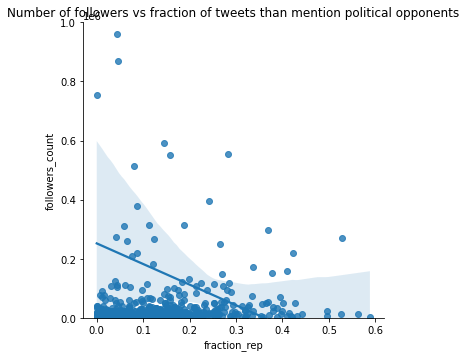

In [273]:
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

sns.lmplot("fraction_rep", "followers_count", data=retweet_final_df[["fraction_rep","followers_count"]])
plt.ylim(0,1000000);
plt.title("Number of followers vs fraction of tweets than mention political opponents");

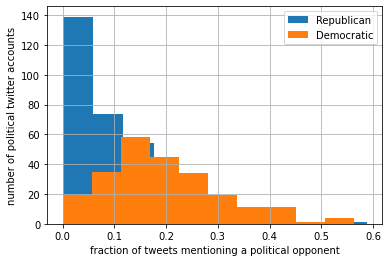

In [270]:
retweet_final_df[retweet_final_df["Party"]=="Republican"]["fraction_rep"].hist(label="Republican")
retweet_final_df[retweet_final_df["Party"]=="Democratic"]["fraction_rep"].hist(label="Democratic")
plt.legend();
plt.xlabel("fraction of tweets mentioning a political opponent");
plt.ylabel("number of political twitter accounts");

In [288]:
most_mentioned_users = user_mentions.groupby("mentioned_user").size().sort_values(ascending=False)

In [289]:
most_mentioned_users = pd.DataFrame(most_mentioned_users, index=most_mentioned_users.index, columns=["number of mentions"])

In [292]:
most_mentioned_users_party=most_mentioned_users.join(user_details.set_index("screen_name"), how="inner")

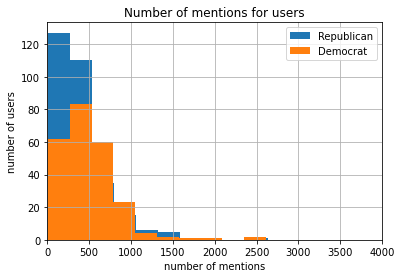

In [306]:
most_mentioned_users_party[most_mentioned_users_party["Party"]=="Republican"]["number of mentions"].hist(bins = 54, label="Republican")
most_mentioned_users_party[most_mentioned_users_party["Party"]=="Democratic"]["number of mentions"].hist(label="Democrat")
plt.xlim(0,4000);
plt.xlabel("number of mentions");
plt.ylabel("number of users");
plt.title("Number of mentions for users");
plt.legend();

In [55]:
users[["favourites_count","followers_count","friends_count","listed_count","statuses_count"]].describe()

,favourites_count,followers_count,friends_count,listed_count,statuses_count
count,548.000000,5.480000e+02,548.000000,548.000000,548.000000
mean,413.912409,1.634339e+05,2033.731752,1340.647810,3658.959854
std,965.151440,1.597357e+06,6278.436076,3567.588267,4259.273134
min,0.000000,4.000000e+00,0.000000,0.000000,0.000000
25%,32.750000,8.960250e+03,368.000000,426.750000,1387.500000
50%,120.500000,1.673200e+04,751.500000,750.000000,2684.000000
75%,379.750000,3.308100e+04,1670.500000,1257.000000,4509.250000
max,12507.000000,3.171258e+07,92934.000000,70660.000000,59535.000000


In [56]:
user_mentions[user_mentions["tweeter"]=='POTUS'].groupby("mentioned_user").size().sort_values(ascending=False)

mentioned_user
realDonaldTrump    119
POTUS              107
WhiteHouse          99
VP                  54
FLOTUS              27
                  ... 
SenThadCochran       1
SenThomTillis        1
SenateYouth          1
SenatorIsakson       1
ABC                  1
Length: 143, dtype: int64

In [57]:
retweet_final_df[retweet_final_df["Party"]=="Republican"].describe()

,fraction_rep,favourites_count,followers_count,friends_count,listed_count,statuses_count
count,299.000000,299.000000,2.990000e+02,299.000000,299.000000,299.000000
mean,0.087378,339.568562,2.194290e+05,1583.311037,1319.247492,3297.923077
std,0.082638,691.152202,2.128528e+06,2978.080608,4403.023255,3585.192808
min,0.000000,0.000000,5.710000e+02,0.000000,1.000000,27.000000
25%,0.029907,33.000000,8.219500e+03,332.000000,351.000000,1207.000000
50%,0.062880,116.000000,1.405700e+04,672.000000,726.000000,2500.000000
75%,0.124105,353.000000,2.773250e+04,1507.500000,1187.000000,4221.000000
max,0.588235,6764.000000,3.171258e+07,34599.000000,70660.000000,35014.000000


In [58]:
retweet_final_df[retweet_final_df["Party"]=="Democratic"].describe()

,fraction_rep,favourites_count,followers_count,friends_count,listed_count,statuses_count
count,237.000000,237.000000,2.370000e+02,237.000000,237.000000,237.000000
mean,0.197688,524.666667,7.850650e+04,2659.270042,1312.632911,4098.902954
std,0.111296,1237.057366,2.807070e+05,8907.393026,1761.447434,4877.395768
min,0.000000,0.000000,4.370000e+02,0.000000,38.000000,16.000000
25%,0.121771,40.000000,1.124000e+04,490.000000,537.000000,1706.000000
50%,0.174432,138.000000,1.978600e+04,886.000000,838.000000,3037.000000
75%,0.262217,434.000000,4.413200e+04,1811.000000,1397.000000,5128.000000
max,0.563348,12507.000000,3.094413e+06,92934.000000,15103.000000,59535.000000


In [59]:
retweet_final_df[retweet_final_df["Party"]=="Republican"].corr()

,fraction_rep,favourites_count,followers_count,friends_count,listed_count,statuses_count
fraction_rep,1.000000,-0.124967,-0.057072,-0.027412,-0.033283,-0.006070
favourites_count,-0.124967,1.000000,-0.029606,0.073997,-0.023197,0.143153
followers_count,-0.057072,-0.029606,1.000000,-0.027937,0.902079,0.445552
friends_count,-0.027412,0.073997,-0.027937,1.000000,0.067161,0.397583
listed_count,-0.033283,-0.023197,0.902079,0.067161,1.000000,0.612529
statuses_count,-0.006070,0.143153,0.445552,0.397583,0.612529,1.000000


In [60]:
retweet_final_df[retweet_final_df["Party"]=="Democratic"].corr()

,fraction_rep,favourites_count,followers_count,friends_count,listed_count,statuses_count
fraction_rep,1.000000,-0.061735,0.062906,-0.008363,0.096839,-0.012698
favourites_count,-0.061735,1.000000,-0.037796,0.024515,-0.047051,0.159313
followers_count,0.062906,-0.037796,1.000000,0.492484,0.883855,0.595792
friends_count,-0.008363,0.024515,0.492484,1.000000,0.411283,0.565854
listed_count,0.096839,-0.047051,0.883855,0.411283,1.000000,0.597763
statuses_count,-0.012698,0.159313,0.595792,0.565854,0.597763,1.000000


In [61]:
retweet_final_df.sort_values(by="statuses_count")

,fraction_rep,Party,favourites_count,followers_count,friends_count,listed_count,statuses_count
tweeter,,,,,,,
RepGonzalez,0.000000,Democratic,1,437,10,38,16
RepRonEstes,0.000000,Republican,10,571,57,24,27
collinpeterson,0.000000,Democratic,19,1348,286,144,80
RepTrey,0.000000,Republican,39,1966,440,126,87
RepLouCorrea,0.313725,Democratic,6,1406,0,102,130
...,...,...,...,...,...,...,...
NYGovCuomo,0.058252,Democratic,2416,311098,596,4441,22610
JohnCornyn,0.070621,Republican,44,105623,11051,4238,23687
RosLehtinen,0.281432,Republican,3,95809,2180,2040,24603


In [62]:
df.created_at

0         2008-08-04 17:28:51
1         2008-08-06 19:04:45
2         2008-08-06 20:35:36
3         2008-08-07 13:52:52
4         2008-08-07 15:12:05
                  ...        
1243365   2017-06-06 17:15:01
1243366   2017-06-06 17:15:03
1243367   2017-06-06 17:15:17
1243368   2017-06-06 17:15:57
1243369   2017-06-06 17:16:00
Name: created_at, Length: 1243370, dtype: datetime64[ns]

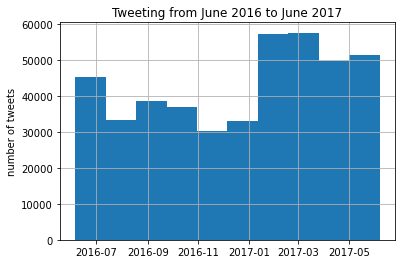

In [309]:
df[df["created_at"]>'2016-06-06'].created_at.hist()
plt.ylabel("number of tweets");
plt.title("Tweeting from June 2016 to June 2017");

In [64]:
df_time = df[["screen_name","created_at"]]

In [65]:
df_time_party = df_time.merge(user_details, how="inner", left_on="screen_name", right_on="screen_name")

In [66]:
df_time_party[["created_at","Party"]]

,created_at,Party
0,2008-08-04 17:28:51,Republican
1,2008-08-06 19:04:45,Republican
2,2008-08-06 20:35:36,Republican
3,2008-08-07 13:52:52,Republican
4,2008-08-07 15:12:05,Republican
...,...,...
1243365,2017-05-25 16:35:24,Republican
1243366,2017-05-27 16:30:16,Republican
1243367,2017-05-29 15:10:14,Republican
1243368,2017-06-01 20:24:51,Republican


<AxesSubplot:>

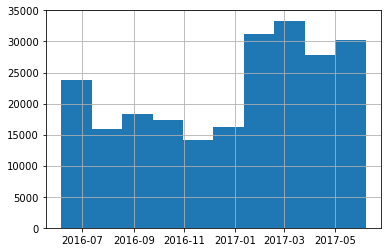

In [67]:
df_time_party[["created_at","Party"]][(df_time_party["created_at"]>"2016-06-06")&(df_time_party["Party"]=="Democratic")]["created_at"].hist()

<AxesSubplot:>

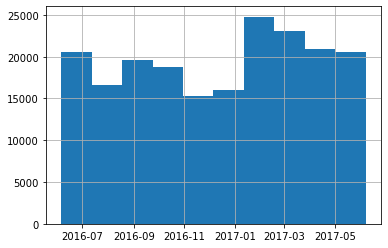

In [68]:
df_time_party[["created_at","Party"]][(df_time_party["created_at"]>"2016-06-06")&(df_time_party["Party"]=="Republican")]["created_at"].hist()

In [69]:
df_time_party[["created_at","Party"]][df_time_party["created_at"]>"2016-06-06"]

,created_at,Party
2213,2016-06-06 15:41:16,Republican
2214,2016-06-07 23:26:26,Republican
2215,2016-06-08 14:57:41,Republican
2216,2016-06-08 15:22:05,Republican
2217,2016-06-08 16:31:29,Republican
...,...,...
1243365,2017-05-25 16:35:24,Republican
1243366,2017-05-27 16:30:16,Republican
1243367,2017-05-29 15:10:14,Republican
1243368,2017-06-01 20:24:51,Republican


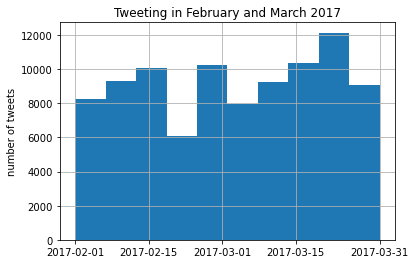

In [310]:
df_time_party[["created_at","Party"]][(df_time_party["created_at"]<"2017-03-31")&(df_time_party["created_at"]>"2017-02-01")]["created_at"].hist()
plt.xticks(["2017-03-31", "2017-03-15", "2017-03-01","2017-02-15","2017-02-01"]);
plt.ylabel("number of tweets");
plt.title("Tweeting in February and March 2017");

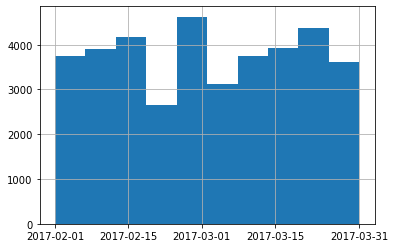

In [308]:
df_time_party[["created_at","Party"]][(df_time_party["created_at"]<"2017-03-31")&(df_time_party["created_at"]>"2017-02-01")&(df_time_party["Party"]=="Republican")]["created_at"].hist()
plt.xticks(["2017-03-31", "2017-03-15", "2017-03-01","2017-02-15","2017-02-01"]);

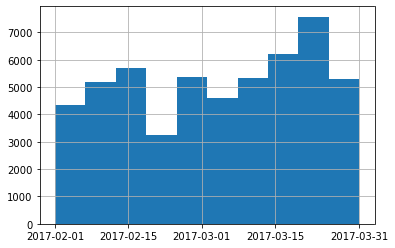

In [272]:
df_time_party[["created_at","Party"]][(df_time_party["created_at"]<"2017-03-31")&(df_time_party["created_at"]>"2017-02-01")&(df_time_party["Party"]=="Democratic")]["created_at"].hist()
plt.xticks(["2017-03-31", "2017-03-15", "2017-03-01","2017-02-15","2017-02-01"]);

# Second part of the assignment - tweet content analysis

Word frequency analysis

In [73]:
df_text = df[["screen_name","text"]]

In [74]:
df_text_party = df_text.merge(user_details, how="inner", left_on="screen_name", right_on="screen_name")

In [75]:
df_text_party

,screen_name,text,id_str,name,favourites_count,followers_count,friends_count,listed_count,statuses_count,Party
0,JohnBoozman,On a conference call about a weekend trip to I...,5558312,Senator John Boozman,72,44936,700,2022,3141,Republican
1,JohnBoozman,Being interviewed by KTHV,5558312,Senator John Boozman,72,44936,700,2022,3141,Republican
2,JohnBoozman,Being interviewed by KARN on his Arkansas Worl...,5558312,Senator John Boozman,72,44936,700,2022,3141,Republican
3,JohnBoozman,"On KWHN in Fort Smith, that's 1320 AM",5558312,Senator John Boozman,72,44936,700,2022,3141,Republican
4,JohnBoozman,Attending a Military of the Purple Heart Cerem...,5558312,Senator John Boozman,72,44936,700,2022,3141,Republican
...,...,...,...,...,...,...,...,...,...,...
1243365,RepRonEstes,My official e-newsletter is up and running. Re...,854715071116849152,Rep. Ron Estes,10,571,57,24,27,Republican
1243366,RepRonEstes,"Glad we could help, and thanks to everyone inv...",854715071116849152,Rep. Ron Estes,10,571,57,24,27,Republican
1243367,RepRonEstes,A brief reflection for #MemorialDay: https://t...,854715071116849152,Rep. Ron Estes,10,571,57,24,27,Republican
1243368,RepRonEstes,A tremendous honor to observe our troops (incl...,854715071116849152,Rep. Ron Estes,10,571,57,24,27,Republican


In [76]:
import regex as re
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Filip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [77]:
df_text_party["text"] = df_text_party["text"].apply(lambda x:re.sub('http\S+(\s|\Z)','',x))
df_text_party["text"] = df_text_party["text"].apply(lambda x:re.sub('\@\w+(\W|\Z)','',x))
df_text_party["text"] = df_text_party["text"].apply(lambda x:re.sub('RT','',x))

In [78]:
fdist = FreqDist()

In [79]:
indexes = np.arange(1,len(df_text_party.text))
for text in df_text_party.text[indexes]:
    for word in word_tokenize(text):
        if len(word)>4:
            fdist[word.lower()] += 1

In [80]:
fdist

FreqDist({'today': 117205, 'great': 71522, 'about': 69125, 'house': 47785, 'their': 45883, 'thanks': 43816, 'thank': 41246, 'support': 34950, 'congress': 33129, 'health': 31672, ...})

In [81]:
fdist.most_common(30)

[('today', 117205),
 ('great', 71522),
 ('about', 69125),
 ('house', 47785),
 ('their', 45883),
 ('thanks', 43816),
 ('thank', 41246),
 ('support', 34950),
 ('congress', 33129),
 ('health', 31672),
 ('watch', 30561),
 ('proud', 29259),
 ('president', 29011),
 ('people', 28833),
 ('state', 28756),
 ('happy', 26229),
 ('women', 25595),
 ('americans', 25478),
 ('should', 24721),
 ('senate', 24534),
 ('american', 24461),
 ('morning', 24199),
 ('families', 23350),
 ('obamacare', 22608),
 ('office', 22040),
 ('students', 21520),
 ('veterans', 21155),
 ('obama', 21154),
 ('hearing', 21033),
 ('would', 20411)]

In [82]:
fdist_rep = FreqDist()
for text in df_text_party[df_text_party["Party"]=="Republican"].text:
    for word in word_tokenize(text):
        if len(word)>4:
            fdist_rep[word.lower()] += 1

In [83]:
fdist_rep

FreqDist({'today': 66305, 'great': 42614, 'about': 37194, 'house': 28871, 'thanks': 24825, 'their': 22676, 'thank': 22316, 'obamacare': 20691, 'watch': 19500, 'president': 18301, ...})

In [84]:
fdist_dem = FreqDist()
for text in df_text_party[df_text_party["Party"]=="Democratic"].text:
    for word in word_tokenize(text):
        if len(word)>4:
            fdist_dem[word.lower()] += 1

In [85]:
fdist_dem

FreqDist({'today': 49601, 'about': 30973, 'great': 28301, 'their': 22522, 'health': 19195, 'house': 18574, 'women': 18484, 'thank': 18226, 'thanks': 18088, 'congress': 17658, ...})

In [86]:
fdist_rep.most_common(20)

[('today', 66305),
 ('great', 42614),
 ('about', 37194),
 ('house', 28871),
 ('thanks', 24825),
 ('their', 22676),
 ('thank', 22316),
 ('obamacare', 20691),
 ('watch', 19500),
 ('president', 18301),
 ('state', 17473),
 ('support', 17261),
 ('obama', 16659),
 ('morning', 16475),
 ('congress', 14978),
 ('senate', 14828),
 ('hearing', 14219),
 ('happy', 13888),
 ('office', 13776),
 ('meeting', 13200)]

In [87]:
fdist_dem.most_common(20)

[('today', 49601),
 ('about', 30973),
 ('great', 28301),
 ('their', 22522),
 ('health', 19195),
 ('house', 18574),
 ('women', 18484),
 ('thank', 18226),
 ('thanks', 18088),
 ('congress', 17658),
 ('support', 17255),
 ('proud', 15965),
 ('americans', 15375),
 ('people', 14715),
 ('trump', 14421),
 ('families', 14216),
 ('should', 13884),
 ('would', 11877),
 ('american', 11486),
 ('happy', 11147)]

In [172]:
! pip install -U textblob
! python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Filip\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Filip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Filip\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Filip\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Filip\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Filip\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


In [88]:
import textblob
from textblob import TextBlob

In [89]:
testimonial = TextBlob(df_text_party.loc[0,"text"])

In [90]:
df_text_party["created_at"] = df["created_at"]

In [91]:
sentiments=[]
for text in df_text_party.text:
    testimonial = TextBlob(text)
    sentiments.append(testimonial.sentiment.polarity)

In [92]:
df_text_party["sentiments"]=sentiments

In [93]:
df_text_party["sentiments_abs"]=np.absolute(df_text_party["sentiments"])

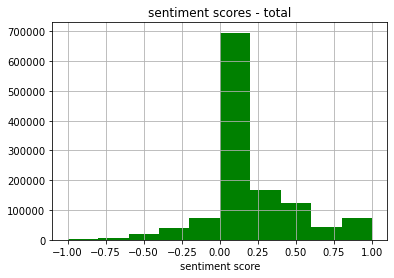

In [316]:
df_text_party.sentiments.hist(color="green")
plt.title("sentiment scores - total");
plt.xlabel("sentiment score");

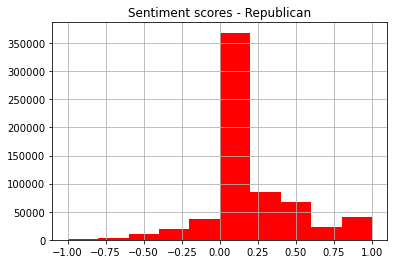

In [317]:
df_text_party[df_text_party["Party"]=="Republican"].sentiments.hist(color="red")
plt.title("Sentiment scores - Republican");

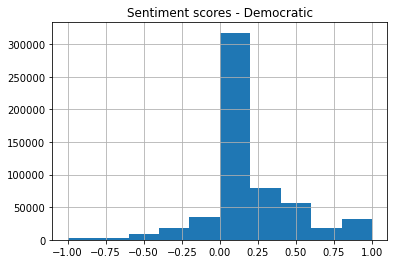

In [95]:
df_text_party[df_text_party["Party"]=="Democratic"].sentiments.hist()
plt.title("Sentiment scores - Democratic");

In [96]:
import datetime
from datetime import datetime
month_year = df_text_party["created_at"].dt.strftime("%Y-%m")

In [97]:
time_sentiments = df_text_party.groupby(month_year).agg({"sentiments":"mean"})

In [98]:
time_sentiments.index

Index(['2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01',
       '2009-02', '2009-03', '2009-04', '2009-05',
       ...
       '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02',
       '2017-03', '2017-04', '2017-05', '2017-06'],
      dtype='object', name='created_at', length=107)

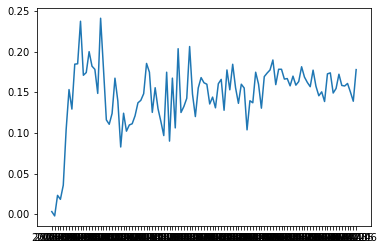

In [99]:
plt.plot(time_sentiments.sentiments)

In [100]:
time_sentiments_abs = df_text_party.groupby(month_year).agg({"sentiments_abs":"mean"})

<AxesSubplot:xlabel='created_at'>

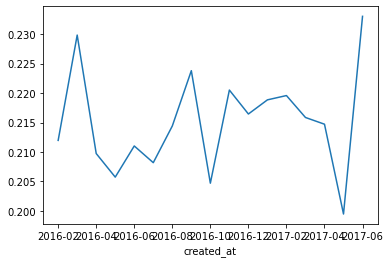

In [101]:
time_sentiments_abs[time_sentiments_abs.index>"2016-01"].sentiments_abs.plot()


<AxesSubplot:xlabel='created_at'>

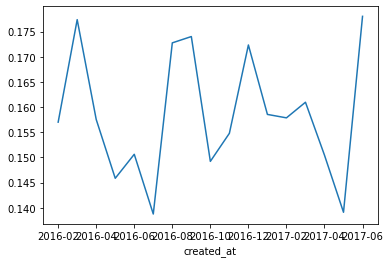

In [102]:
time_sentiments[time_sentiments.index>"2016-01"].sentiments.plot()


In [104]:
time_sentiments_rep = df_text_party[df_text_party["Party"]=="Republican"].groupby(month_year).agg({"sentiments":"mean"})
time_sentiments_dem = df_text_party[df_text_party["Party"]=="Democratic"].groupby(month_year).agg({"sentiments":"mean"})

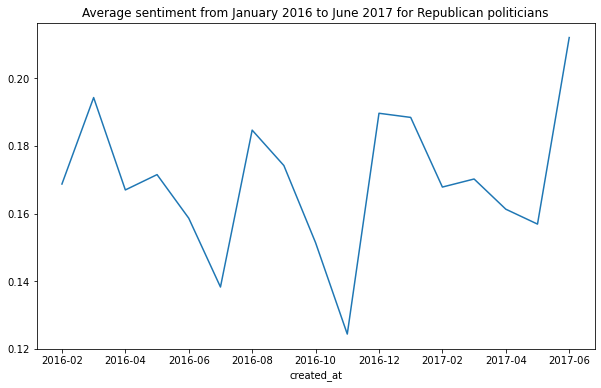

In [329]:
time_sentiments_rep[time_sentiments_rep.index>"2016-01"].sentiments.plot(figsize=(10,6))
plt.title("Average sentiment from January 2016 to June 2017 for Republican politicians");

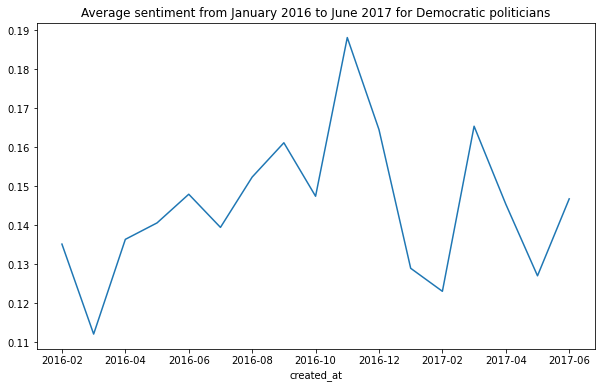

In [328]:
time_sentiments_dem[time_sentiments_dem.index>"2016-01"].sentiments.plot(figsize=(10,6))
plt.title("Average sentiment from January 2016 to June 2017 for Democratic politicians");

In [331]:
time_sentiments_rep_abs = df_text_party[df_text_party["Party"]=="Republican"].groupby(month_year).agg({"sentiments_abs":"mean"})
time_sentiments_dem_abs = df_text_party[df_text_party["Party"]=="Democratic"].groupby(month_year).agg({"sentiments_abs":"mean"})

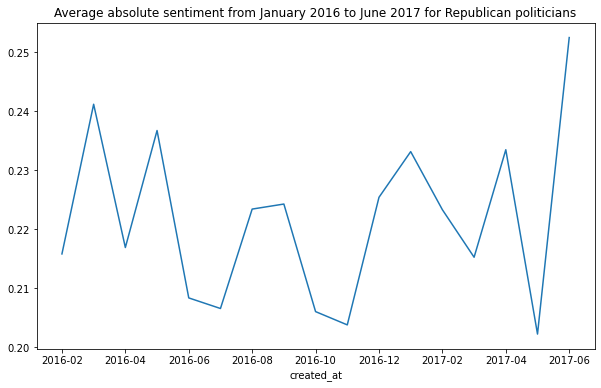

In [334]:
time_sentiments_rep_abs[time_sentiments_rep_abs.index>"2016-01"].sentiments_abs.plot(figsize=(10,6))
plt.title("Average absolute sentiment from January 2016 to June 2017 for Republican politicians");

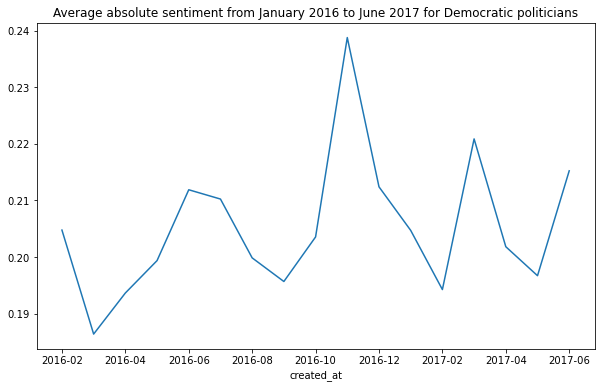

In [333]:
time_sentiments_dem_abs[time_sentiments_dem_abs.index>"2016-01"].sentiments_abs.plot(figsize=(10,6))
plt.title("Average absolute sentiment from January 2016 to June 2017 for Democratic politicians");

In [142]:
indexes_immigration = []
for index, text in enumerate(df_text_party.text):
    if "immigration" in text:
        indexes_immigration.append(index)

indexes_crime = []
for index, text in enumerate(df_text_party.text):
    if "crime" in text:
        indexes_crime.append(index)

indexes_healthcare = []
for index, text in enumerate(df_text_party.text):
    if "healthcare" in text:
        indexes_healthcare.append(index)

indexes_today = []
for index, text in enumerate(df_text_party.text):
    if "today" in text:
        indexes_today.append(index)



In [147]:
df_text_party.loc[indexes_immigration,:]

,screen_name,text,id_str,name,favourites_count,followers_count,friends_count,listed_count,statuses_count,Party,created_at,sentiments,sentiments_abs
482,JohnBoozman,I joined my colleagues in sending a letter to ...,5558312,Senator John Boozman,72,44936,700,2022,3141,Republican,2009-02-24 23:17:33,0.136364,0.136364
644,JohnBoozman,I'm visiting w/who is broadcasting from DC. Ta...,5558312,Senator John Boozman,72,44936,700,2022,3141,Republican,2009-03-05 19:15:55,0.000000,0.000000
664,JohnBoozman,"Serious immigration reform is long overdue, bu...",5558312,Senator John Boozman,72,44936,700,2022,3141,Republican,2009-03-06 20:44:29,-0.191667,0.191667
675,JohnBoozman,My statement on the Supreme Court's ruling on ...,5558312,Senator John Boozman,72,44936,700,2022,3141,Republican,2009-03-07 13:39:08,0.000000,0.000000
723,JohnBoozman,I support the ICE agents lawsuit against DHS. ...,5558312,Senator John Boozman,72,44936,700,2022,3141,Republican,2009-03-11 17:17:28,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242636,SenKamalaHarris,On the floor now - about to give my maiden spe...,803694179079458816,Kamala Harris,209,80273,401,652,674,Democratic,2017-06-06 11:01:36,0.136364,0.136364
1242666,SenKamalaHarris,Holding a policy forum on immigration in L.A. ...,803694179079458816,Kamala Harris,209,80273,401,652,674,Democratic,2017-06-06 12:12:27,0.211039,0.211039
1242770,SenKamalaHarris,Another reason immigration is such an economic...,803694179079458816,Kamala Harris,209,80273,401,652,674,Democratic,2017-06-06 13:39:04,0.100000,0.100000
1242951,SenKamalaHarris,What you may have missed this week: I pushed S...,803694179079458816,Kamala Harris,209,80273,401,652,674,Democratic,2017-06-06 14:48:52,0.000000,0.000000


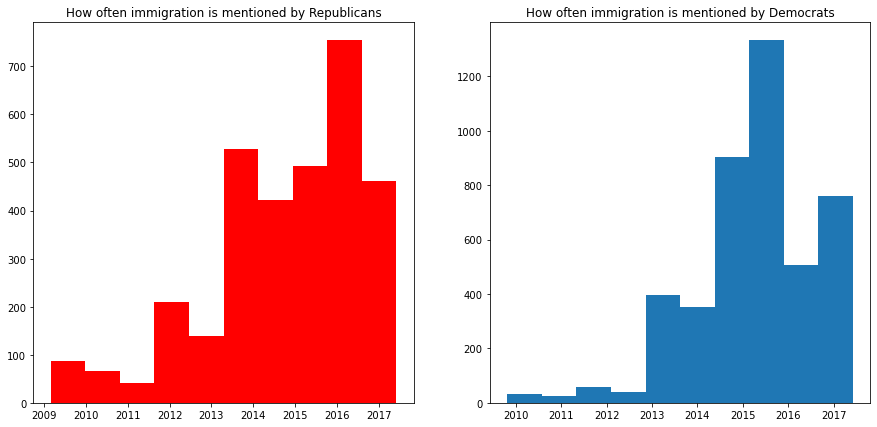

In [313]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7))
ax1.hist(df_text_party.loc[indexes_immigration,:][df_text_party.loc[indexes_immigration,:]["Party"]=="Republican"]["created_at"], color="red")
ax2.hist(df_text_party.loc[indexes_immigration,:][df_text_party.loc[indexes_immigration,:]["Party"]=="Democratic"]["created_at"])
ax1.set_title("How often immigration is mentioned by Republicans");
ax2.set_title("How often immigration is mentioned by Democrats");



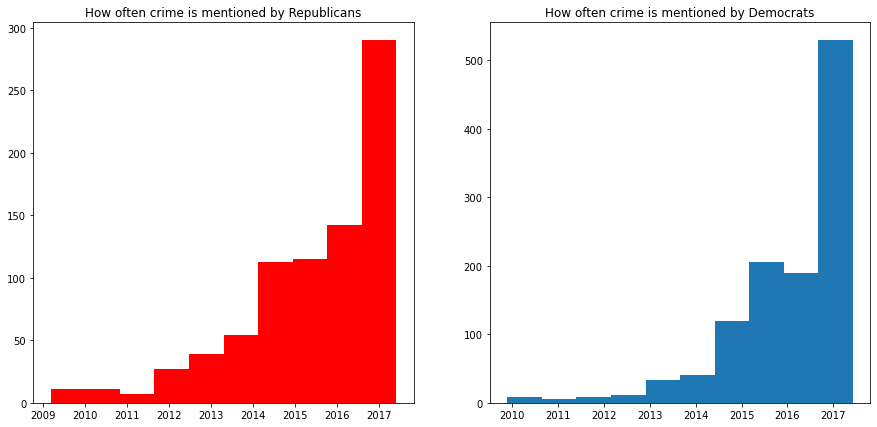

In [312]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7))
ax1.hist(df_text_party.loc[indexes_crime,:][df_text_party.loc[indexes_crime,:]["Party"]=="Republican"]["created_at"], color="red")
ax2.hist(df_text_party.loc[indexes_crime,:][df_text_party.loc[indexes_crime,:]["Party"]=="Democratic"]["created_at"])
ax1.set_title("How often crime is mentioned by Republicans");
ax2.set_title("How often crime is mentioned by Democrats");


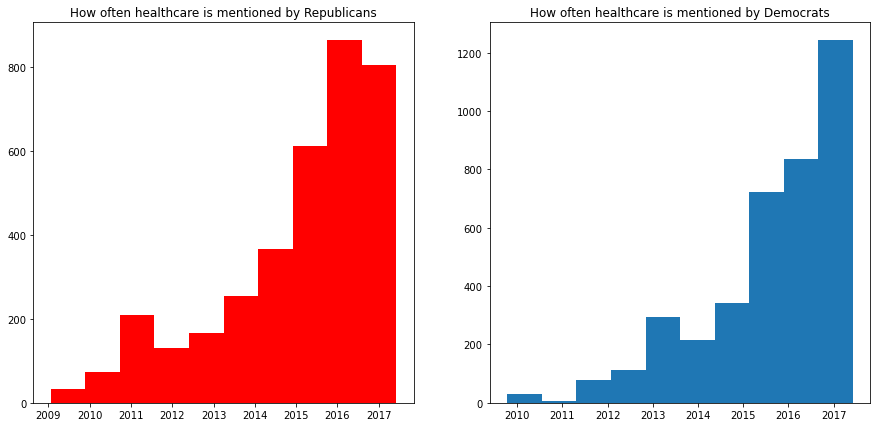

In [311]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7))
ax1.hist(df_text_party.loc[indexes_healthcare,:][df_text_party.loc[indexes_healthcare,:]["Party"]=="Republican"]["created_at"], color="red")
ax2.hist(df_text_party.loc[indexes_healthcare,:][df_text_party.loc[indexes_healthcare,:]["Party"]=="Democratic"]["created_at"])
ax1.set_title("How often healthcare is mentioned by Republicans");
ax2.set_title("How often healthcare is mentioned by Democrats");


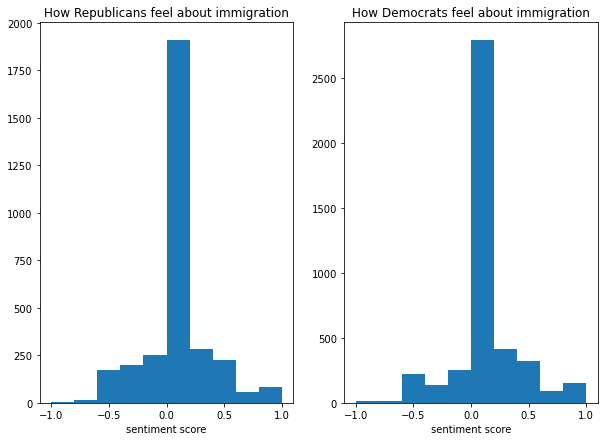

In [191]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,7));
ax1.hist(df_text_party.loc[indexes_immigration,:][df_text_party.loc[indexes_immigration,:]["Party"]=="Republican"]["sentiments"]);
ax2.hist(df_text_party.loc[indexes_immigration,:][df_text_party.loc[indexes_immigration,:]["Party"]=="Democratic"]["sentiments"]);
ax1.set_title("How Republicans feel about immigration");
ax2.set_title("How Democrats feel about immigration");
ax1.set_xlabel("sentiment score");
ax2.set_xlabel("sentiment score");

Finally, some topic modelling!

In [198]:
rep_tweets = list(df_text_party[df_text_party["Party"]=="Republican"]["text"])

In [200]:
import pickle
import gensim
from sklearn.feature_extraction.text import CountVectorizer

In [201]:
vect = CountVectorizer(min_df=1000, max_df=0.2, stop_words='english', 
                       token_pattern='(?u)\\b\\w\\w\\w+\\b')

In [202]:
X = vect.fit_transform(rep_tweets)


In [203]:
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)


In [204]:
id_map = dict((v, k) for k, v in vect.vocabulary_.items())


In [205]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=10, id2word=id_map, passes=25, random_state=34)

In [206]:
ldamodel.print_topics()

[(0,
  '0.050*"today" + 0.047*"office" + 0.032*"county" + 0.030*"rob" + 0.027*"make" + 0.025*"staff" + 0.025*"join" + 0.022*"amp" + 0.022*"right" + 0.022*"talk"'),
 (1,
  '0.042*"read" + 0.042*"health" + 0.040*"care" + 0.038*"obamacare" + 0.026*"know" + 0.026*"americans" + 0.026*"life" + 0.024*"better" + 0.022*"don" + 0.020*"check"'),
 (2,
  '0.080*"great" + 0.055*"thanks" + 0.031*"today" + 0.029*"meeting" + 0.029*"amp" + 0.028*"trump" + 0.028*"good" + 0.020*"morning" + 0.015*"visit" + 0.015*"clinton"'),
 (3,
  '0.048*"house" + 0.032*"act" + 0.032*"amp" + 0.030*"support" + 0.027*"senate" + 0.027*"law" + 0.025*"vote" + 0.023*"today" + 0.017*"legislation" + 0.016*"passed"'),
 (4,
  '0.043*"ohio" + 0.041*"forward" + 0.040*"america" + 0.040*"tonight" + 0.034*"tune" + 0.034*"gov" + 0.026*"looking" + 0.025*"safe" + 0.024*"tomorrow" + 0.024*"town"'),
 (5,
  '0.087*"watch" + 0.034*"discuss" + 0.033*"amp" + 0.028*"icymi" + 0.028*"live" + 0.024*"statement" + 0.022*"hatch" + 0.022*"hearing" + 0.0

In [242]:
dem_tweets = list(df_text_party[df_text_party["Party"]=="Democratic"]["text"])

In [244]:
vect = CountVectorizer(min_df=1000, max_df=0.2, stop_words='english', 
                       token_pattern='(?u)\\b\\w\\w\\w+\\b')
X = vect.fit_transform(dem_tweets)
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())
ldamodel = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=10, id2word=id_map, passes=25, random_state=34)

In [245]:
ldamodel.print_topics()

[(0,
  '0.051*"proud" + 0.049*"join" + 0.043*"day" + 0.041*"state" + 0.039*"today" + 0.032*"week" + 0.028*"national" + 0.027*"office" + 0.026*"make" + 0.025*"security"'),
 (1,
  '0.067*"amp" + 0.053*"great" + 0.053*"thanks" + 0.031*"today" + 0.027*"community" + 0.022*"meeting" + 0.018*"russia" + 0.015*"discuss" + 0.015*"members" + 0.015*"meet"'),
 (2,
  '0.041*"amp" + 0.036*"happy" + 0.031*"fight" + 0.031*"continue" + 0.027*"going" + 0.026*"justice" + 0.024*"president" + 0.022*"statement" + 0.022*"love" + 0.022*"today"'),
 (3,
  '0.045*"jobs" + 0.036*"want" + 0.034*"tax" + 0.026*"tomorrow" + 0.025*"amp" + 0.021*"new" + 0.021*"open" + 0.020*"let" + 0.020*"talking" + 0.020*"joining"'),
 (4,
  '0.085*"amp" + 0.036*"families" + 0.029*"working" + 0.028*"need" + 0.027*"stand" + 0.026*"help" + 0.026*"protect" + 0.023*"country" + 0.016*"gun" + 0.016*"economy"'),
 (5,
  '0.048*"house" + 0.041*"vote" + 0.032*"senate" + 0.024*"congress" + 0.023*"amp" + 0.022*"right" + 0.021*"climate" + 0.021*"tim

In [216]:
df_text_party.loc[indexes_healthcare,:].groupby("screen_name").agg({"statuses_count":"mean","followers_count":"mean","sentiments":"mean"}).corr()

,statuses_count,followers_count,sentiments
statuses_count,1.000000,0.339786,-0.065188
followers_count,0.339786,1.000000,0.050012
sentiments,-0.065188,0.050012,1.000000


In [229]:
df_text_party["retweet_count"]=df["retweet_count"]

In [241]:
df_text_party[df_text_party["created_at"]>'2017-01-01'].groupby("screen_name").agg({"sentiments":"mean", "sentiments_abs":"mean","retweet_count":"mean"})\
                  .join(retweet_final_df, how="inner").corr()

,sentiments,sentiments_abs,retweet_count,fraction_rep,favourites_count,followers_count,friends_count,listed_count,statuses_count
sentiments,1.000000,0.905426,0.146596,-0.294544,-0.163778,-0.076266,-0.070072,-0.126955,-0.257750
sentiments_abs,0.905426,1.000000,0.170420,-0.241801,-0.143726,0.068941,-0.040422,0.045767,-0.164767
retweet_count,0.146596,0.170420,1.000000,-0.033424,-0.056431,-0.063324,-0.056953,-0.039781,-0.062779
fraction_rep,-0.294544,-0.241801,-0.033424,1.000000,-0.016079,-0.140244,-0.071635,-0.115234,-0.013190
favourites_count,-0.163778,-0.143726,-0.056431,-0.016079,1.000000,-0.059484,0.030283,-0.051764,0.082604
followers_count,-0.076266,0.068941,-0.063324,-0.140244,-0.059484,1.000000,0.043314,0.900131,0.343632
friends_count,-0.070072,-0.040422,-0.056953,-0.071635,0.030283,0.043314,1.000000,0.174767,0.692372
listed_count,-0.126955,0.045767,-0.039781,-0.115234,-0.051764,0.900131,0.174767,1.000000,0.547691
statuses_count,-0.257750,-0.164767,-0.062779,-0.013190,0.082604,0.343632,0.692372,0.547691,1.000000


In [255]:
sentiments_rep=df_text_party[df_text_party["Party"]=="Republican"].groupby(month_year).agg({"sentiments":"mean"}).rename(columns={"sentiments":"sentiments_rep"})

In [256]:
sentiments_dem=df_text_party[df_text_party["Party"]=="Democratic"].groupby(month_year).agg({"sentiments":"mean"}).rename(columns={"sentiments":"sentiments_dem"})

In [257]:
sentiments_rep["sentiments_dem"]=sentiments_dem["sentiments_dem"]

In [259]:
sentiments_rep.corr()

,sentiments_rep,sentiments_dem
sentiments_rep,1.000000,-0.058202
sentiments_dem,-0.058202,1.000000
